In [16]:
import pandas as pd
import ast
import spacy
import re

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
# Load triplets dataframe 
triplets_df_nostop= pd.read_csv(r'C:\Users\Student\Desktop\Thesis-Coding\triplets_dataframe_clean.csv')

def convert_to_list(column):
    return column.apply(ast.literal_eval)

triplets_df_nostop['Content'] = convert_to_list(triplets_df_nostop['Content'])
triplets_df_nostop['triplets_list'] = convert_to_list(triplets_df_nostop['triplets_list'])

In [3]:
triplets_df_nostop.head()

,Title,Articles,Content,coreference_list_ready,Cleaned_Content_new,triplets_list,empty_list,many_triplets,head,relation,tail,is_stopword
0,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 1 Subject matter,[\nThis Regulation lays down the rules for the...,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,"[this regulation, lay, the rules for the estab...",False,False,this regulation,lay,the rules for the establishment and the implem...,False
1,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,applicant means a natural person or an entity ...,applicant means a natural person or an entity ...,"[applicant, mean, a natural person or an entit...",False,True,applicant,mean,a natural person or an entity with or without ...,False
2,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,application document means a tender a request ...,application document means a tender a request ...,"[application document, mean, a tender a reques...",False,False,application document,mean,a tender a request to participate a grant appl...,False
3,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,award procedure means a procurement procedure ...,award procedure means a procurement procedure ...,"[award procedure, mean, a procurement procedur...",False,False,award procedure,mean,a procurement procedure a grant award procedur...,False
4,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,basic act means a legal act other than a recom...,basic act means a legal act other than a recom...,"[basic act, mean, a legal act other than a rec...",False,True,basic act,mean,a legal act other than a recommendation or an ...,False


In [18]:
triplets_df_nostop.iloc[1,2]

[' ‘applicant’ means a natural person or an entity with or without legal personality who has submitted an application \nin a grant award procedure or in a contest for prizes; ',
 ' ‘application document’ means a tender, a request to participate, a grant application or an application in a contest for \nprizes; ',
 ' ‘award procedure’ means a procurement procedure, a grant award procedure, a contest for prizes, or a procedure for \nthe selection of experts or persons or entities implementing the budget pursuant to point (c) of the first \nsubparagraph of Article 62(1); ',
 ' ‘basic act’ means a legal act, other than a recommendation or an opinion, which provides a legal basis for an action \nand for the implementation of the corresponding expenditure entered in the budget or of the budgetary guarantee \nor financial assistance backed by the budget, and which may take any of the following forms: \n(a) in implementation of the Treaty on the Functioning of the European Union (TFEU) and the 

In [19]:
triplets_df_nostop[triplets_df_nostop["Title"]=='TITLE II \nBUDGET AND BUDGETARY PRINCIPLES ']["relation"].unique()

array(['implement', 'set', 'authorise', 'be charge', 'shall contain',
       'shall consist', 'shall cover', 'prevent', 'be commit', 'be make',
       'provide', 'be book', 'be enter', 'be', 'be authorise',
       'be adjust', 'refer', 'have reach', 'adopt', 'be approve',
       'be lay', 'be carry', 'be complete', 'have adopt', 'use', 'exceed',
       'be return', 'shall take', 'shall inform', 'state', 'be apply',
       'carry', 'commit', 'annex', 'be pay', 'cancel', 'be decommitte',
       'correspond', 'apply', 'shall examine', 'shall decide', 'belong',
       'require', 'may authorise', 'shall', 'shall enter', 'take',
       'shall submit', 'inform', 'wish', 'be give', 'shall act',
       'be exceed', 'raise', 'be draw', 'be present', 'account',
       'be establish', 'avoid', 'be calculate', 'be use',
       'shall constitute', 'participate', 'receive', 'transfer',
       'may assign', 'specify', 'shall include', 'indicate',
       'shall comprise', 'may receive', 'be show', 'be 

In [20]:
def keep_sec_word(relation):
    if ' ' in relation:
        return relation.split(' ')[1].strip()
    else:
        return relation 
    
triplets_df_nostop['relation'] = triplets_df_nostop['relation'].apply(keep_sec_word)

triplets_df_nostop[triplets_df_nostop["Title"]=='TITLE II \nBUDGET AND BUDGETARY PRINCIPLES ']["relation"].unique()

array(['implement', 'set', 'authorise', 'charge', 'contain', 'consist',
       'cover', 'prevent', 'commit', 'make', 'provide', 'book', 'enter',
       'be', 'adjust', 'refer', 'reach', 'adopt', 'approve', 'lay',
       'carry', 'complete', 'use', 'exceed', 'return', 'take', 'inform',
       'state', 'apply', 'annex', 'pay', 'cancel', 'decommitte',
       'correspond', 'examine', 'decide', 'belong', 'require', 'shall',
       'submit', 'wish', 'give', 'act', 'raise', 'draw', 'present',
       'account', 'establish', 'avoid', 'calculate', 'constitute',
       'participate', 'receive', 'transfer', 'assign', 'specify',
       'include', 'indicate', 'comprise', 'show', 'save', 'express',
       'estimate', 'send', 'base', 'accommodate', 'monitor', 'accept',
       'concern', 'explain', 'mean', 'support', 'finance', 'limited',
       'list', 'treat', 'earmark', 'subdivide', 'accompany', 'propose',
       'may', 'deliberate', 'intend', 'consider', 'refrain', 'reduce',
       'represent', 'am

In [22]:
# Remove stopwords, punctuation from heads 
nlp = spacy.load("en_core_web_sm")
lemmatizer = nlp.get_pipe("lemmatizer")


stop_words = spacy.lang.en.stop_words.STOP_WORDS 
stopwords = list(stop_words)
punctuation = '!@#$%^&*_-+={}[];"\'|<>,?/~`’‘()'



def lemmatize(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

def tokens(text):
    doc = nlp(text)
    tokens = []
    for token in doc:
        tokens.append(token)
    return tokens

def remove_punct(text):
    tokens_list = tokens(text)
    new_list = []
    for token in tokens_list:
        new_token = ""
        for letter in token.text:
            if letter not in punctuation:
                new_token = new_token + letter
        new_list.append(new_token)
    return new_list

def remove_punct_text(text):
    tokens_list = tokens(text)
    new_list = []
    for token in tokens_list:
        new_token = ""
        for letter in token.text:
            if letter not in punctuation:
                new_token = new_token + letter
        new_list.append(new_token)
    return " ".join(new_list)

def remove_stopwords(text):
    text_tokens = remove_punct(text)
    new_text = " "
    for token in text_tokens:
        if token not in stopwords:
               new_text = new_text + ' ' + str(token)
    return lemmatize(new_text).strip()

def remove_stopwords_no_lemma(text):
    text_tokens = remove_punct(text)
    new_text = " "
    for token in text_tokens:
        if token not in stopwords:
               new_text = new_text + ' ' + str(token)
    return new_text.strip()

def tokens_len(text):
    doc = nlp(text)
    tokens = []
    for token in doc:
        tokens.append(token)
    return len(tokens)


# def get_noun_chuncks(text_head):
#     chunks = []
#     doc = nlp(text_head)
#     for chunk in doc.noun_chunks:
#         chunks.append(chunk.text)
#     if len(chunks) != 0:
#         return chunks
#     else:
#         return [text_head]
    
def get_noun_chuncks(text_head):
    chunks = []
    doc = nlp(text_head)
    for chunk in doc.noun_chunks:
        new_chunk = remove_stopwords_no_lemma(chunk.text)
        chunks.append(new_chunk)
    if len(chunks) != 0:
        return chunks
    else:
        return [text_head]


def tf_idf_dict(corpus_list):
    tfidf = TfidfVectorizer(stop_words='english', smooth_idf=True)
    result = tfidf.fit_transform(corpus_list)

    feature_names = tfidf.get_feature_names_out()
    df_tfidf = pd.DataFrame(result.toarray(), columns=feature_names)

    word_scores = df_tfidf.sum(axis=0)
    sorted_words = word_scores.sort_values(ascending=False)

    sorted_words_asc = word_scores.sort_values(ascending=False)

    sorted_words_asc = sorted_words_asc.to_frame().reset_index().rename(columns={'index': 'token', 0: 'tf-idf'})

    sorted_words_dict_asc = sorted_words_asc.set_index('token')['tf-idf'].to_dict()
     
    return sorted_words_dict_asc
    

In [23]:

def top_noun_chunk(noun_chunk, tf_idf_dict):
    example_noun_scores = {}
    for noun in noun_chunk:
        total_score = 0
        for word in tokens(noun):
           if word.text in tf_idf_dict.keys():
               total_score = total_score + tf_idf_dict[word.text]
        if noun not in example_noun_scores:
             example_noun_scores[noun] = total_score
    max_chunk = max(example_noun_scores, key=example_noun_scores.get)
    
    return max_chunk

In [24]:
# punctuation, stopwords, lemmatization
triplets_df_nostop['head_nostop'] = triplets_df_nostop['head'].apply(remove_stopwords)

In [25]:
triplets_df_nostop.shape

(4089, 13)

In [26]:
# Keep Heads that contain NOUNS 
nlp = spacy.load("en_core_web_sm")

def contains_nouns(text):
    doc = nlp(text)
    k = False
    tags = []
    for token in doc:
        tags.append(spacy.explain(token.pos_))
    if "noun" in tags:
            k=True
    return k


triplets_df_nostop["head_has_noun"] = triplets_df_nostop["tail"].apply(contains_nouns)
triplets_df_nostop["tail_has_noun"] = triplets_df_nostop["head_nostop"].apply(contains_nouns)
triplets_df_nostop = triplets_df_nostop[(triplets_df_nostop["head_has_noun"]==True) & (triplets_df_nostop["tail_has_noun"]==True)]
triplets_df_nostop.shape

(3373, 15)

In [27]:
example = triplets_df_nostop.iloc[0,10]
example

'the rules for the establishment and the implementation of the general budget of the european union and of the european atomic energy community (the budget) and the presentation and auditing of the european union and of the european atomic energy community accounts'

In [28]:
get_noun_chuncks(example)

['rules',
 'establishment',
 'implementation',
 'general budget',
 'european union',
 'european atomic energy community',
 'budget',
 'presentation',
 'auditing',
 'european union']

In [29]:
triplets_df_nostop['head_noun_chunks'] = triplets_df_nostop['head'].apply(get_noun_chuncks)
triplets_df_nostop['tail_noun_chunks'] = triplets_df_nostop['tail'].apply(get_noun_chuncks)

In [31]:
triplets_df_nostop.head()

,Title,Articles,Content,coreference_list_ready,Cleaned_Content_new,triplets_list,empty_list,many_triplets,head,relation,tail,is_stopword,head_nostop,head_has_noun,tail_has_noun,head_noun_chunks,tail_noun_chunks
0,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 1 Subject matter,[\nThis Regulation lays down the rules for the...,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,"[this regulation, lay, the rules for the estab...",False,False,this regulation,lay,the rules for the establishment and the implem...,False,regulation,True,True,[regulation],"[rules, establishment, implementation, general..."
1,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,applicant means a natural person or an entity ...,applicant means a natural person or an entity ...,"[applicant, mean, a natural person or an entit...",False,True,applicant,mean,a natural person or an entity with or without ...,False,applicant,True,True,[applicant],"[natural person, entity, legal personality, , ..."
2,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,application document means a tender a request ...,application document means a tender a request ...,"[application document, mean, a tender a reques...",False,False,application document,mean,a tender a request to participate a grant appl...,False,application document,True,True,[application document],"[tender, request, grant application, applicati..."
3,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,award procedure means a procurement procedure ...,award procedure means a procurement procedure ...,"[award procedure, mean, a procurement procedur...",False,False,award procedure,mean,a procurement procedure a grant award procedur...,False,award procedure,True,True,[award procedure],"[procurement procedure, grant award procedure,..."
4,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,basic act means a legal act other than a recom...,basic act means a legal act other than a recom...,"[basic act, mean, a legal act other than a rec...",False,True,basic act,mean,a legal act other than a recommendation or an ...,False,basic act,True,True,[basic act],"[legal act, recommendation, opinion, , legal b..."


In [32]:
# Get the corpus of heads and tails

tail_corpus = list(triplets_df_nostop['tail'].unique())
head_corpus = list(triplets_df_nostop['head'].unique())

tf_idf_dict_tail = tf_idf_dict(tail_corpus)
tf_idf_dict_head = tf_idf_dict(head_corpus)


In [33]:
# Get top noun chunk based on tf-idf scores 

triplets_df_nostop['new_tail'] = triplets_df_nostop['tail_noun_chunks'].apply(lambda x: top_noun_chunk(x, tf_idf_dict_tail))
triplets_df_nostop['new_head'] = triplets_df_nostop['head_noun_chunks'].apply(lambda x: top_noun_chunk(x, tf_idf_dict_head))


In [34]:
list(triplets_df_nostop['new_tail'])

['european union',
 'grant award procedure',
 'grant application',
 'article 621',
 'european union',
 'grant agreement',
 'support andor financial instruments',
 'budget',
 'article',
 'budget appropriations',
 'financial obligation',
 'contract',
 'valid building permit',
 'valid building permit',
 'accordance',
 'restricted procedure',
 'contracting authority',
 'payment',
 'management',
 'payment',
 'operating risk',
 'normal operating conditions',
 'potential financial obligation',
 'public contract',
 'public contract',
 'article 621',
 'article 621',
 'adequate management',
 'implementation',
 'budgetary guarantee',
 'natural resources',
 'budgetary commitment',
 'completely electronic process',
 'natural legal person',
 'services',
 'immovable property',
 'management control',
 'management control',
 'company',
 'union institutions',
 'accordance',
 'financial asset',
 'financial support',
 'financial asset',
 'public contract',
 'specific contracts',
 'specific contracts',
 'a

In [35]:
# remove punctation
triplets_df_nostop['new_tail'] = triplets_df_nostop['new_tail'].apply(remove_punct_text)
triplets_df_nostop['new_head'] = triplets_df_nostop['new_head'].apply(remove_punct_text)


In [36]:
list(triplets_df_nostop['new_head'])

['regulation',
 'applicant',
 'application document',
 'award procedure',
 'basic act',
 'beneficiary',
 'blending facility',
 'support andor financial instruments',
 'budget implementation',
 'budgetary commitment',
 'budgetary guarantee',
 'building contract',
 'land buildings',
 'candidate',
 'land buildings',
 'candidate',
 'central purchasing body',
 'concession contract',
 'contract',
 'remuneration',
 'concession contract',
 'concessionaire',
 'contingent liability',
 'contract',
 'contractor',
 'contribution agreement',
 'agreement',
 'control',
 'controls',
 'counterpart',
 'crisis',
 'decommitment',
 'dynamic purchasing system',
 'economic operator',
 'natural legal person',
 'natural legal person',
 'equity investment',
 'equity investor',
 'equity investor',
 'european office',
 'final administrative decision',
 'financial asset',
 'financial instrument',
 'financial liability',
 'framework contract',
 'public contract',
 'purpose',
 'global provisioning',
 'resources',
 'r

In [37]:
# lemmatization and stopwords 

triplets_df_nostop['new_tail'] = triplets_df_nostop['new_tail'].apply(remove_stopwords)
triplets_df_nostop['new_head'] = triplets_df_nostop['new_head'].apply(remove_stopwords)





In [38]:
list(triplets_df_nostop['new_tail'])

['european union',
 'grant award procedure',
 'grant application',
 'article 621',
 'european union',
 'grant agreement',
 'support andor financial instrument',
 'budget',
 'article',
 'budget appropriation',
 'financial obligation',
 'contract',
 'valid building permit',
 'valid building permit',
 'accordance',
 'restrict procedure',
 'contracting authority',
 'payment',
 'management',
 'payment',
 'operating risk',
 'normal operating condition',
 'potential financial obligation',
 'public contract',
 'public contract',
 'article 621',
 'article 621',
 'adequate management',
 'implementation',
 'budgetary guarantee',
 'natural resource',
 'budgetary commitment',
 'completely electronic process',
 'natural legal person',
 'service',
 'immovable property',
 'management control',
 'management control',
 'company',
 'union institution',
 'accordance',
 'financial asset',
 'financial support',
 'financial asset',
 'public contract',
 'specific contract',
 'specific contract',
 'article',
 

In [39]:
pattern = '\n'
triplets_df_nostop['Title'] = triplets_df_nostop['Title'].apply(lambda x: re.sub(pattern, '', x).strip())

# Visualizations of Triplets (Rule Based NER & RE)

In [45]:
# Load triplets dataframe 
rule_based_triplets = pd.read_csv(r'C:\Users\Student\Desktop\Thesis-Coding\triplets_neo4j_2.csv')

rule_based_triplets.head()

,Head,Relation,Tail,Original Tail,Tail Noun Chunks,Title,Article,Original Article Text
0,regulation,lay,european union,the rules for the establishment and the implem...,"['rules', 'establishment', 'implementation', '...","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 1 Subject matter,['\nThis Regulation lays down the rules for th...
1,applicant,mean,grant award procedure,a natural person or an entity with or without ...,"['natural person', 'entity', 'legal personalit...","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 2 Definitions,[' ‘applicant’ means a natural person or an en...
2,application document,mean,grant application,a tender a request to participate a grant appl...,"['tender', 'request', 'grant application', 'ap...","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 2 Definitions,[' ‘applicant’ means a natural person or an en...
3,award procedure,mean,article 621,a procurement procedure a grant award procedur...,"['procurement procedure', 'grant award procedu...","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 2 Definitions,[' ‘applicant’ means a natural person or an en...
4,basic act,mean,european union,a legal act other than a recommendation or an ...,"['legal act', 'recommendation', 'opinion', '',...","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 2 Definitions,[' ‘applicant’ means a natural person or an en...


In [46]:
def convert_to_list(column):
    return column.apply(ast.literal_eval)

rule_based_triplets['Tail Noun Chunks'] = convert_to_list(rule_based_triplets['Tail Noun Chunks'])
rule_based_triplets['Original Article Text'] = convert_to_list(rule_based_triplets['Original Article Text'])

In [47]:
rule_based_triplets["Title"].unique()

array(['TITLE I SUBJECT MATTER, DEFINITIONS AND GENERAL PRINCIPLES',
       'TITLE II BUDGET AND BUDGETARY PRINCIPLES',
       'TITLE III ESTABLISHMENT AND STRUCTURE OF THE BUDGET',
       'TITLE IV BUDGET IMPLEMENTATION', 'TITLE V COMMON RULES',
       'TITLE VI INDIRECT MANAGEMENT',
       'TITLE VII PROCUREMENT AND CONCESSIONS', 'TITLE VIII GRANTS',
       'TITLE IX PRIZES',
       'TITLE X FINANCIAL INSTRUMENTS, BUDGETARY GUARANTEES AND FINANCIAL ASSISTANCE',
       'TITLE XI CONTRIBUTIONS TO EUROPEAN POLITICAL PARTIES',
       'TITLE XII OTHER BUDGET IMPLEMENTATION INSTRUMENTS',
       'TITLE XIII ANNUAL ACCOUNTS AND OTHER FINANCIAL REPORTING',
       'TITLE XIV EXTERNAL AUDIT AND DISCHARGE',
       'TITLE XV ADMINISTRATIVE APPROPRIATIONS',
       'TITLE XVI INFORMATION REQUESTS AND DELEGATED ACTS'], dtype=object)

In [48]:
rule_based_triplets["Original Tail"].tolist()

['the rules for the establishment and the implementation of the general budget of the european union and of the european atomic energy community (the budget) and the presentation and auditing of the european union and of the european atomic energy community accounts',
 'a natural person or an entity with or without legal personality who has submitted an application in a grant award procedure or in a contest for prizes',
 'a tender a request to participate a grant application or an application in a contest for prizes',
 'a procurement procedure a grant award procedure a contest for prizes or a procedure for the selection of experts or persons or entities implementing the budget pursuant to point of the first subparagraph of article 62(1',
 'a legal act other than a recommendation or an opinion which provides a legal basis for an action and for the implementation of the corresponding expenditure entered in the budget or of the budgetary guarantee or financial assistance backed by the bud

In [49]:
# remove puctuation from original tail store in new column
rule_based_triplets["Clean Original Tail"] = rule_based_triplets["Original Tail"].apply(remove_punct_text)

In [50]:
rule_based_triplets.head()

,Head,Relation,Tail,Original Tail,Tail Noun Chunks,Title,Article,Original Article Text,Clean Original Tail
0,regulation,lay,european union,the rules for the establishment and the implem...,"[rules, establishment, implementation, general...","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 1 Subject matter,[\nThis Regulation lays down the rules for the...,the rules for the establishment and the implem...
1,applicant,mean,grant award procedure,a natural person or an entity with or without ...,"[natural person, entity, legal personality, , ...","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,a natural person or an entity with or without ...
2,application document,mean,grant application,a tender a request to participate a grant appl...,"[tender, request, grant application, applicati...","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,a tender a request to participate a grant appl...
3,award procedure,mean,article 621,a procurement procedure a grant award procedur...,"[procurement procedure, grant award procedure,...","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,a procurement procedure a grant award procedur...
4,basic act,mean,european union,a legal act other than a recommendation or an ...,"[legal act, recommendation, opinion, , legal b...","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,a legal act other than a recommendation or an ...


In [ ]:
# rule_based_triplets.to_csv('triplets_for_ELMo.csv', index=False) 

In [51]:
rule_based_triplets.iloc[0,3]

'the rules for the establishment and the implementation of the general budget of the european union and of the european atomic energy community (the budget) and the presentation and auditing of the european union and of the european atomic energy community accounts'

In [70]:
rule_based_triplets.head()

,Head,Relation,Tail,Original Tail,Tail Noun Chunks,Title,Article,Original Article Text,Clean Original Tail,Tail First Tokens
0,regulation,lay,european union,the rules for the establishment and the implem...,"[rules, establishment, implementation, general...","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 1 Subject matter,[\nThis Regulation lays down the rules for the...,the rules for the establishment and the implem...,the rules for the establishment and the implem...
1,applicant,mean,grant award procedure,a natural person or an entity with or without ...,"[natural person, entity, legal personality, , ...","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,a natural person or an entity with or without ...,a natural person or an entity with or
2,application document,mean,grant application,a tender a request to participate a grant appl...,"[tender, request, grant application, applicati...","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,a tender a request to participate a grant appl...,a tender a request to participate a grant
3,award procedure,mean,article 621,a procurement procedure a grant award procedur...,"[procurement procedure, grant award procedure,...","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,a procurement procedure a grant award procedur...,a procurement procedure a grant award procedure a
4,basic act,mean,european union,a legal act other than a recommendation or an ...,"[legal act, recommendation, opinion, , legal b...","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,a legal act other than a recommendation or an ...,a legal act other than a recommendation or


In [53]:
rule_based_triplets.iloc[0,4]

['rules',
 'establishment',
 'implementation',
 'general budget',
 'european union',
 'european atomic energy community',
 'budget',
 'presentation',
 'auditing',
 'european union']

In [73]:
rule_based_triplets.isna().sum()

Head                     0
Relation                 0
Tail                     0
Original Tail            0
Tail Noun Chunks         0
Title                    0
Article                  0
Original Article Text    0
Clean Original Tail      0
Tail First Tokens        0
dtype: int64

In [74]:
rule_based_triplets.dropna(inplace=True)

In [75]:
" ".join(rule_based_triplets.iloc[0,8].split()[0:8])

'the rules for the establishment and the implementation'

In [76]:
rule_based_triplets['Tail First Tokens'] = rule_based_triplets['Clean Original Tail'].apply(lambda x: " ".join(x.split()[0:8]))

In [77]:
rule_based_triplets['Tail First Tokens']

0       the rules for the establishment and the implem...
1                   a natural person or an entity with or
2               a tender a request to participate a grant
3       a procurement procedure a grant award procedure a
4              a legal act other than a recommendation or
                              ...                        
3243        to budgetary guarantees only as from the date
3244                             212 and 213 article 2142
3245    the information on the annual average of fulltime
3246           for the first time together with the draft
3247    binding in this regulation entirety and direct...
Name: Tail First Tokens, Length: 3248, dtype: object

In [78]:
rule_based_triplets.dropna(inplace=True)

In [79]:
rule_based_triplets.duplicated(["Head","Relation",'Tail First Tokens']).sum()

0

In [80]:
rule_based_triplets.drop_duplicates(["Head","Relation",'Tail First Tokens'], inplace=True, ignore_index=True)

In [106]:
rule_based_triplets["Title"].unique()

array(['TITLE I SUBJECT MATTER, DEFINITIONS AND GENERAL PRINCIPLES',
       'TITLE II BUDGET AND BUDGETARY PRINCIPLES',
       'TITLE III ESTABLISHMENT AND STRUCTURE OF THE BUDGET',
       'TITLE IV BUDGET IMPLEMENTATION', 'TITLE V COMMON RULES',
       'TITLE VI INDIRECT MANAGEMENT',
       'TITLE VII PROCUREMENT AND CONCESSIONS', 'TITLE VIII GRANTS',
       'TITLE IX PRIZES',
       'TITLE X FINANCIAL INSTRUMENTS, BUDGETARY GUARANTEES AND FINANCIAL ASSISTANCE',
       'TITLE XI CONTRIBUTIONS TO EUROPEAN POLITICAL PARTIES',
       'TITLE XII OTHER BUDGET IMPLEMENTATION INSTRUMENTS',
       'TITLE XIII ANNUAL ACCOUNTS AND OTHER FINANCIAL REPORTING',
       'TITLE XIV EXTERNAL AUDIT AND DISCHARGE',
       'TITLE XV ADMINISTRATIVE APPROPRIATIONS',
       'TITLE XVI INFORMATION REQUESTS AND DELEGATED ACTS'], dtype=object)

In [286]:
# For chapter 2


visualization = triplets_vis(rule_based_triplets,'TITLE XVI INFORMATION REQUESTS AND DELEGATED ACTS')



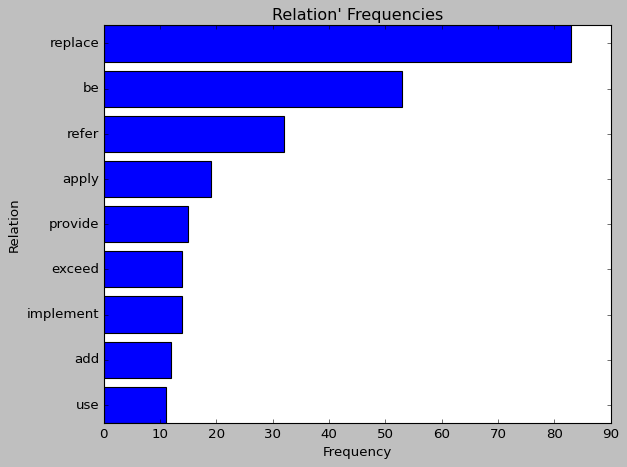

In [320]:
visualization.freq_bar_plot(10)

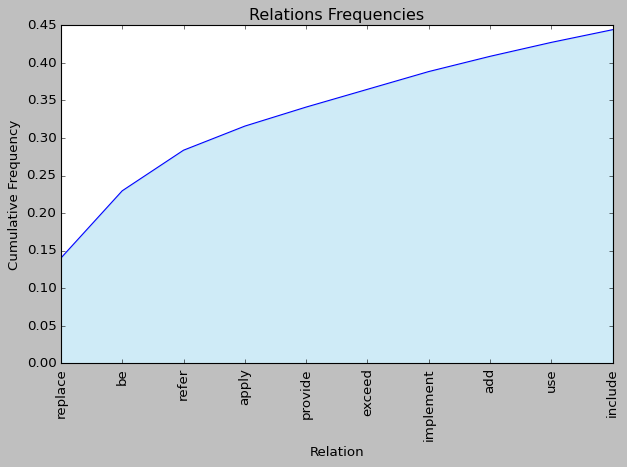

In [323]:
visualization.cumulative_freq_plot(9)

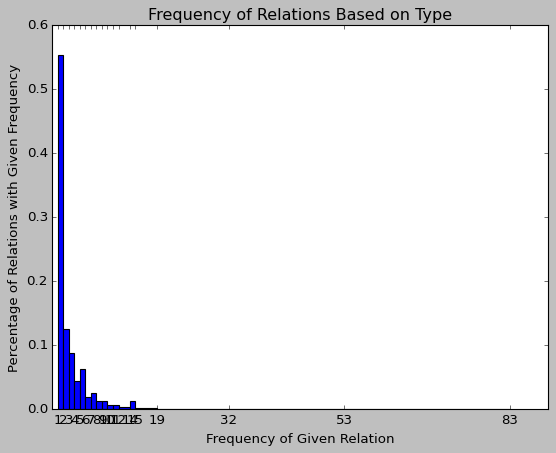

In [312]:
visualization.relations_type_freq_plot()

In [ ]:
# create a sub-dataframe of only the most frequent triplets per chapter 

# remove above 2 relations
# 

In [324]:
relation_frequencies = visualization.relations_freq

relation_frequencies[relation_frequencies["Frequency"]>9]



,Relation,Frequency,Relative Freq,Standardized_Frequency,Scaled_Max_Frequency,Cumulative Frequency,Relative Cumulative Frequency
0,replace,83,0.140203,9.536409,1.000000,83,0.140203
1,be,53,0.089527,5.929733,0.638554,136,0.229730
2,refer,32,0.054054,3.405060,0.385542,168,0.283784
3,apply,19,0.032095,1.842167,0.228916,187,0.315878
4,provide,15,0.025338,1.361277,0.180723,202,0.341216
5,exceed,14,0.023649,1.241055,0.168675,216,0.364865
6,implement,14,0.023649,1.241055,0.168675,230,0.388514
7,add,12,0.020270,1.000610,0.144578,242,0.408784
8,use,11,0.018581,0.880387,0.132530,253,0.427365
9,include,10,0.016892,0.760165,0.120482,263,0.444257


In [325]:
relations_above = relation_frequencies[relation_frequencies["Frequency"]>9].iloc[:,0].tolist()
relations_above

['replace',
 'be',
 'refer',
 'apply',
 'provide',
 'exceed',
 'implement',
 'add',
 'use',
 'include']

In [151]:


def get_filter_dataframe(frequency_border, title):

    visualization = triplets_vis(rule_based_triplets,title)

    relation_frequencies = visualization.relations_freq

    relations_above = relation_frequencies[relation_frequencies["Frequency"]>frequency_border].iloc[:,0].tolist()

    rule_triplets = rule_based_triplets[rule_based_triplets["Title"]==title]

    rule_triplets_filtered = rule_triplets[rule_triplets['Relation'].isin(relations_above)]

    rule_triplets_filtered.reset_index(drop=True, inplace=True)

    return (rule_triplets_filtered)



In [326]:
rule_triplets_XVI = get_filter_dataframe(9, 'TITLE XVI INFORMATION REQUESTS AND DELEGATED ACTS')

In [327]:
rule_triplets_XVI.shape

(263, 10)

In [328]:
rule_triplets_XVI.to_csv(r'C:\Users\Student\Desktop\Thesis-Coding\rule_based_per_chapter_use_cases\rule_triplets_XVI.csv', index=False)  

## Descriptive Statistics of Entities and Relations per Title

In [23]:
rule_based_triplets.groupby("Title")[["Relation"]].nunique()

,Relation
Title,
"TITLE I SUBJECT MATTER, DEFINITIONS AND GENERAL PRINCIPLES",28
TITLE II BUDGET AND BUDGETARY PRINCIPLES,92
TITLE III ESTABLISHMENT AND STRUCTURE OF THE BUDGET,74
TITLE IV BUDGET IMPLEMENTATION,205
TITLE IX PRIZES,14
TITLE V COMMON RULES,133
TITLE VI INDIRECT MANAGEMENT,49
TITLE VII PROCUREMENT AND CONCESSIONS,71
TITLE VIII GRANTS,105


In [24]:
rule_based_triplets.groupby("Title")[["Tail"]].nunique()

,Tail
Title,
"TITLE I SUBJECT MATTER, DEFINITIONS AND GENERAL PRINCIPLES",64
TITLE II BUDGET AND BUDGETARY PRINCIPLES,123
TITLE III ESTABLISHMENT AND STRUCTURE OF THE BUDGET,68
TITLE IV BUDGET IMPLEMENTATION,321
TITLE IX PRIZES,20
TITLE V COMMON RULES,134
TITLE VI INDIRECT MANAGEMENT,49
TITLE VII PROCUREMENT AND CONCESSIONS,86
TITLE VIII GRANTS,137


In [25]:
rule_based_triplets.groupby("Title")[["Head"]].nunique()

,Head
Title,
"TITLE I SUBJECT MATTER, DEFINITIONS AND GENERAL PRINCIPLES",87
TITLE II BUDGET AND BUDGETARY PRINCIPLES,100
TITLE III ESTABLISHMENT AND STRUCTURE OF THE BUDGET,58
TITLE IV BUDGET IMPLEMENTATION,239
TITLE IX PRIZES,10
TITLE V COMMON RULES,102
TITLE VI INDIRECT MANAGEMENT,40
TITLE VII PROCUREMENT AND CONCESSIONS,55
TITLE VIII GRANTS,102


In [28]:
relations_freq = rule_based_triplets[rule_based_triplets["Title"]=='TITLE II BUDGET AND BUDGETARY PRINCIPLES'].groupby(["Relation"])["Relation"].count().reset_index(name='count').sort_values(by=('count'), ascending=False)
relations_freq['Relative Freq'] = relations_freq['count'] / relations_freq['count'].sum()
relations_freq = relations_freq.rename(columns={"relation": "Relation", "count": "Frequency"})
relations_freq = relations_freq.reset_index(drop=True)

transformer = StandardScaler()
transformer_scaler = MaxAbsScaler()
relations_freq['Standardized_Frequency'] = transformer.fit_transform(relations_freq[['Frequency']]).flatten()
relations_freq['Scaled_Max_Frequency'] = transformer_scaler.fit_transform(relations_freq[['Frequency']]).flatten()

relations_freq['Cumulative Frequency'] = relations_freq['Frequency'].cumsum()
relations_freq['Relative Cumulative Frequency'] = relations_freq['Relative Freq'].cumsum()

relations_freq

,Relation,Frequency,Relative Freq,Standardized_Frequency,Scaled_Max_Frequency,Cumulative Frequency,Relative Cumulative Frequency
0,refer,28,0.096886,5.239202,1.000000,28,0.096886
1,make,26,0.089965,4.817683,0.928571,54,0.186851
2,be,20,0.069204,3.553127,0.714286,74,0.256055
3,enter,14,0.048443,2.288571,0.500000,88,0.304498
4,use,11,0.038062,1.656293,0.392857,99,0.342561
...,...,...,...,...,...,...,...
87,identifie,1,0.003460,-0.451300,0.035714,285,0.986159
88,indicate,1,0.003460,-0.451300,0.035714,286,0.989619
89,lay,1,0.003460,-0.451300,0.035714,287,0.993080
90,limited,1,0.003460,-0.451300,0.035714,288,0.996540


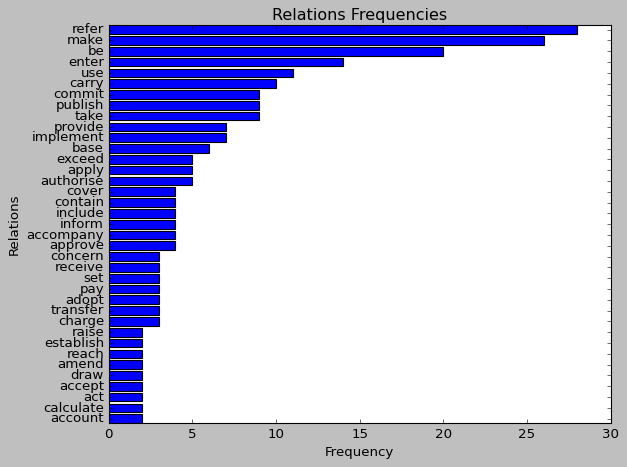

In [29]:
#barplot
plt.style.use('classic')
fig, ax = plt.subplots()


ax.barh(relations_freq[relations_freq['Frequency'] > 1]['Relation'], relations_freq[relations_freq['Frequency'] > 1]['Frequency'])
ax.invert_yaxis()
ax.set_ylabel('Relations')
ax.set_xlabel('Frequency')
ax.set_title('Relations Frequencies')

plt.tight_layout()
# ax.tick_params(axis='y', labelsize=8)

plt.show()

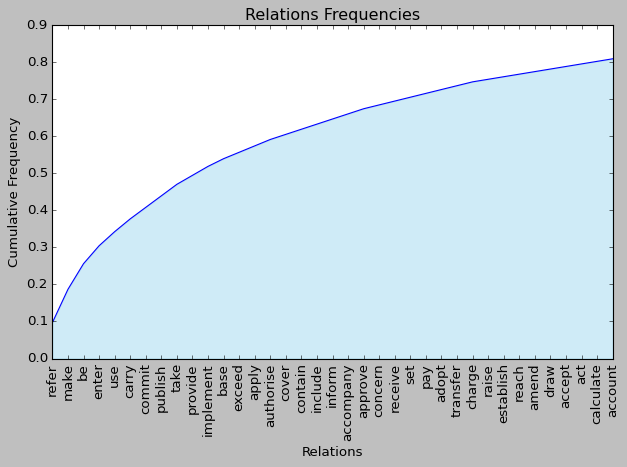

In [30]:
#barplot
plt.style.use('classic')
fig, ax = plt.subplots()


ax.plot(relations_freq[relations_freq['Frequency'] > 1]['Relation'], relations_freq[relations_freq['Frequency'] > 1]['Relative Cumulative Frequency'])

ax.fill_between(
    relations_freq[relations_freq['Frequency'] > 1]['Relation'], 
    relations_freq[relations_freq['Frequency'] > 1]['Relative Cumulative Frequency'], 
    color='skyblue', alpha=0.4
)


# ax.invert_yaxis()
ax.set_ylabel('Cumulative Frequency')
ax.set_xlabel('Relations')
ax.set_title('Relations Frequencies')

plt.xticks(rotation=90)
plt.tight_layout()
# ax.tick_params(axis='y', labelsize=8)

plt.show()

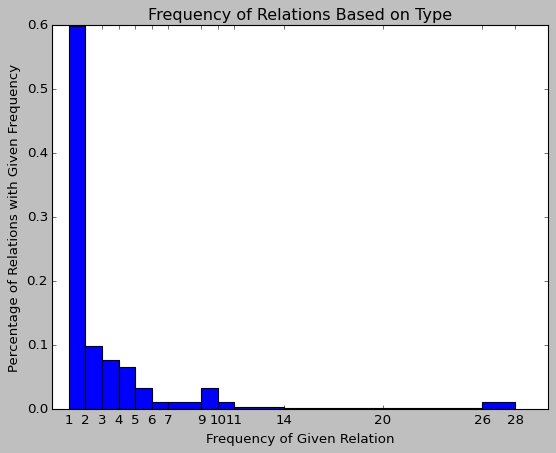

In [32]:
#histogram
plt.style.use('classic')
fig, ax = plt.subplots()

bins = np.sort(relations_freq['Frequency'].unique())

ax.hist(relations_freq['Frequency'], density=True, bins=bins)

ax.set_xticks(bins)
ax.set_xticklabels(bins ,ha='center')

ax.set_ylabel('Percentage of Relations with Given Frequency')
ax.set_xlabel('Frequency of Given Relation')
ax.set_title('Frequency of Relations Based on Type')



plt.show()

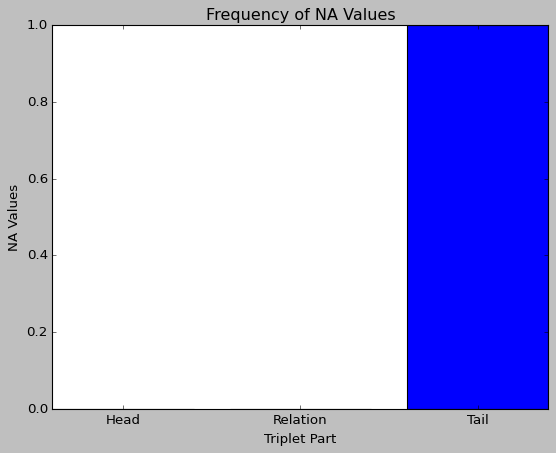

In [72]:
na_values = rule_based_triplets[rule_based_triplets["Title"]=='TITLE II BUDGET AND BUDGETARY PRINCIPLES'][["Head","Relation","Tail"]].isna().sum().to_frame().reset_index()
na_values = na_values.rename(columns={"index": "Triplet", 0: "Frequency"})
plt.style.use('classic')
fig, ax = plt.subplots()

ax.bar(na_values['Triplet'],na_values['Frequency'])

ax.set_ylabel('NA Values')
ax.set_xlabel('Triplet Part')
ax.set_title('Frequency of NA Values')



plt.show()

In [79]:
rule_based_triplets.isna().sum()

Head                     2
Relation                 0
Tail                     6
Original Tail            0
Tail Noun Chunks         0
Title                    0
Article                  0
Original Article Text    0
dtype: int64

In [78]:
rule_based_triplets[rule_based_triplets["Title"]=='TITLE II BUDGET AND BUDGETARY PRINCIPLES'].isna().sum()

Head                     0
Relation                 0
Tail                     1
Original Tail            0
Tail Noun Chunks         0
Title                    0
Article                  0
Original Article Text    0
dtype: int64

In [74]:
rows_with_na = rule_based_triplets[rule_based_triplets["Title"]=='TITLE II BUDGET AND BUDGETARY PRINCIPLES'][rule_based_triplets[rule_based_triplets["Title"]=='TITLE II BUDGET AND BUDGETARY PRINCIPLES'].isna().any(axis=1)]
rows_with_na

,Head,Relation,Tail,Original Tail,Tail Noun Chunks,Title,Article,Original Article Text
230,budget,indicate,NaN,the amount,[the amount],TITLE II BUDGET AND BUDGETARY PRINCIPLES,Article 21 Assigned revenue,[ \nExternal assigned revenue and internal ass...


In [76]:
rule_based_triplets[rule_based_triplets["Title"]=='TITLE II BUDGET AND BUDGETARY PRINCIPLES'].dropna(inplace=True)

C:\Users\Student\AppData\Local\Temp\ipykernel_14792\729409588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rule_based_triplets[rule_based_triplets["Title"]=='TITLE II BUDGET AND BUDGETARY PRINCIPLES'].dropna(inplace=True)


In [ ]:
self.dataframe[self.dataframe["Title"]==self.title].dropna(inplace=True)

## Define Visualization Class for Frequencies and NA values

In [143]:
class triplets_vis:
    def __init__(self, dataframe, title):
        self.title = title
        self.dataframe = dataframe

        self.unique_relation_per_title = self.dataframe.groupby("Title")[["Relation"]].nunique()
        self.unique_heads_per_title = self.dataframe.groupby("Title")[["Head"]].nunique()
        self.unique_tails_per_title = self.dataframe.groupby("Title")[["Tail"]].nunique()

        self.relations_freq = self.dataframe[self.dataframe["Title"]==self.title].groupby(["Relation"])["Relation"].count().reset_index(name='count').sort_values(by=('count'), ascending=False)
        self.relations_freq['Relative Freq'] = self.relations_freq['count'] / self.relations_freq['count'].sum()
        self.relations_freq = self.relations_freq.rename(columns={"relation": "Relation", "count": "Frequency"})
        self.relations_freq = self.relations_freq.reset_index(drop=True)

        transformer = StandardScaler()
        transformer_scaler = MaxAbsScaler()
        self.relations_freq['Standardized_Frequency'] = transformer.fit_transform(self.relations_freq[['Frequency']]).flatten()
        self.relations_freq['Scaled_Max_Frequency'] = transformer_scaler.fit_transform(self.relations_freq[['Frequency']]).flatten()

        self.relations_freq['Cumulative Frequency'] = self.relations_freq['Frequency'].cumsum()
        self.relations_freq['Relative Cumulative Frequency'] = self.relations_freq['Relative Freq'].cumsum()

    def na_bar_plot(self):
        
        na_values = self.dataframe[self.dataframe["Title"]==self.title][["Head","Relation","Tail"]].isna().sum().to_frame().reset_index()
        na_values = na_values.rename(columns={"index": "Triplet", 0: "Frequency"})
        plt.style.use('classic')
        fig, ax = plt.subplots()

        ax.bar(na_values['Triplet'],na_values['Frequency'])

        ax.set_ylabel('NA Values')
        ax.set_xlabel('Triplet Part')
        ax.set_title('Frequency of NA Values')

        plt.show()

    def na_table(self):

        na_values = self.dataframe[self.dataframe["Title"]==self.title][["Head","Relation","Tail"]].isna().sum().to_frame().reset_index()
        na_values = na_values.rename(columns={"index": "Triplet", 0: "Frequency"})

        return na_values
    
    def freq_bar_plot(self, border):

        plt.style.use('classic')
        fig, ax = plt.subplots()


        ax.barh(self.relations_freq[self.relations_freq['Frequency'] > border]['Relation'], self.relations_freq[self.relations_freq['Frequency'] > border]['Frequency'])
        ax.invert_yaxis()
        ax.set_ylabel('Relation')
        ax.set_xlabel('Frequency')
        ax.set_title("Relation' Frequencies")

        plt.tight_layout()
        # ax.tick_params(axis='y', labelsize=8)

        plt.show()


        plt.style.use('classic')


    def cumulative_freq_plot(self, border):

        fig, ax = plt.subplots()


        ax.plot(self.relations_freq[self.relations_freq['Frequency'] > border]['Relation'], self.relations_freq[self.relations_freq['Frequency'] > border]['Relative Cumulative Frequency'])

        ax.fill_between(
            self.relations_freq[self.relations_freq['Frequency'] > border]['Relation'], 
            self.relations_freq[self.relations_freq['Frequency'] > border]['Relative Cumulative Frequency'], 
            color='skyblue', alpha=0.4
        )


        # ax.invert_yaxis()
        ax.set_ylabel('Cumulative Frequency')
        ax.set_xlabel('Relation')
        ax.set_title('Relations Frequencies')

        plt.xticks(rotation=90)
        plt.tight_layout()
        # ax.tick_params(axis='y', labelsize=8)

        plt.show()

    def relations_type_freq_plot(self):

        plt.style.use('classic')
        fig, ax = plt.subplots()

        bins = np.sort(self.relations_freq['Frequency'].unique())

        ax.hist(self.relations_freq['Frequency'], density=True, bins=bins)

        ax.set_xticks(bins)
        ax.set_xticklabels(bins ,ha='center')

        ax.set_ylabel('Percentage of Relations with Given Frequency')
        ax.set_xlabel('Frequency of Given Relation')
        ax.set_title('Frequency of Relations Based on Type')
        
        plt.show()






In [49]:
rule_based_triplets["Title"].unique()

array(['TITLE I SUBJECT MATTER, DEFINITIONS AND GENERAL PRINCIPLES',
       'TITLE II BUDGET AND BUDGETARY PRINCIPLES',
       'TITLE III ESTABLISHMENT AND STRUCTURE OF THE BUDGET',
       'TITLE IV BUDGET IMPLEMENTATION', 'TITLE V COMMON RULES',
       'TITLE VI INDIRECT MANAGEMENT',
       'TITLE VII PROCUREMENT AND CONCESSIONS', 'TITLE VIII GRANTS',
       'TITLE IX PRIZES',
       'TITLE X FINANCIAL INSTRUMENTS, BUDGETARY GUARANTEES AND FINANCIAL ASSISTANCE',
       'TITLE XI CONTRIBUTIONS TO EUROPEAN POLITICAL PARTIES',
       'TITLE XII OTHER BUDGET IMPLEMENTATION INSTRUMENTS',
       'TITLE XIII ANNUAL ACCOUNTS AND OTHER FINANCIAL REPORTING',
       'TITLE XIV EXTERNAL AUDIT AND DISCHARGE',
       'TITLE XV ADMINISTRATIVE APPROPRIATIONS',
       'TITLE XVI INFORMATION REQUESTS AND DELEGATED ACTS'], dtype=object)

In [81]:
barplot = triplets_vis(rule_based_triplets, 'TITLE X FINANCIAL INSTRUMENTS, BUDGETARY GUARANTEES AND FINANCIAL ASSISTANCE')

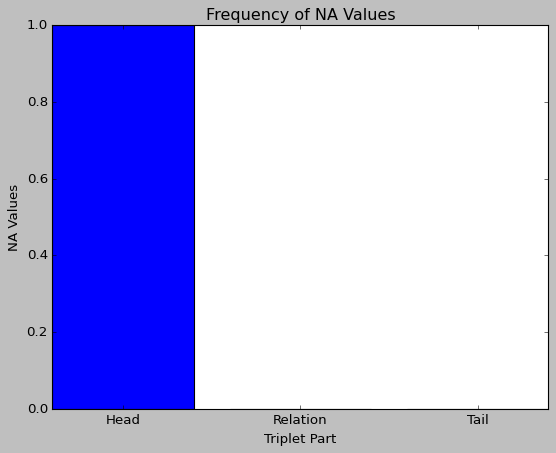

In [85]:
barplot.na_bar_plot()

# Visualization of Triplets (Relik NER & RE)

In [149]:
# Load triplets dataframe 
relik_triplets_article = pd.read_csv(r'relik_RE_triples_per_whole_article.csv')
relik_triplets_paragraph = pd.read_csv(r'relik_RE_triples_per_paragraph_per_article.csv')
relik_triplets_sentence = pd.read_csv(r'relik_RE_triples_per_sentence.csv')

pattern = '\n'
relik_triplets_article['Title'] = relik_triplets_article['Title'].apply(lambda x: re.sub(pattern, '', x).strip())

relik_triplets_paragraph['Title'] = relik_triplets_paragraph['Title'].apply(lambda x: re.sub(pattern, '', x).strip())

relik_triplets_sentence['Title'] = relik_triplets_sentence['Title'].apply(lambda x: re.sub(pattern, '', x).strip())

relik_triplets_article['Articles'] = relik_triplets_article['Articles'].apply(lambda x: x.strip())

relik_triplets_paragraph['Articles'] = relik_triplets_paragraph['Articles'].apply(lambda x: x.strip())

relik_triplets_sentence['Articles'] = relik_triplets_sentence['Articles'].apply(lambda x: x.strip())

In [150]:
relik_triplets_sentence.head()

,Title,Articles,coreference_list_ready,coreference_paragraph_clean,coreference_sentence,triplets_sentence,coreference_sentence_clean,triplets_sentence_clean
0,"TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 1 Subject matter,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,NaN,this regulation lays down the rules for the es...,NaN
1,"TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 2 Definitions,‘applicant’ means a natural person or an entit...,applicant means a natural person or an entity ...,‘applicant’ means a natural person or an entit...,NaN,applicant means a natural person or an entity ...,NaN
2,"TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 2 Definitions,"‘application document’ means a tender, a reque...",application document means a tender a request ...,"‘application document’ means a tender, a reque...","[['application', 'subclass of', 'tender']]",application document means a tender a request ...,NaN
3,"TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 2 Definitions,‘award procedure’ means a procurement procedur...,award procedure means a procurement procedure ...,‘award procedure’ means a procurement procedur...,NaN,award procedure means a procurement procedure ...,"[['grant', 'subclass of', 'procurement'], ['gr..."
4,"TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 2 Definitions,"‘basic act’ means a legal act, other than a re...",basic act means a legal act other than a recom...,"‘basic act’ means a legal act, other than a re...","[['tfeu', 'foundational text', 'treaty on the ...",basic act means a legal act other than a recom...,"[['tfeu', 'foundational text', 'treaty on the ..."


In [151]:
# def convert_to_list(column):
#     return column.apply(ast.literal_eval)

def convert_to_list(column):
    return column.apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


relik_triplets_article['triplets_whole_orig'] = convert_to_list(relik_triplets_article['triplets_whole_orig'])
relik_triplets_article['triplets_whole_clean'] = convert_to_list(relik_triplets_article['triplets_whole_clean'])

relik_triplets_paragraph['triplets_paragraph_orig'] = convert_to_list(relik_triplets_paragraph['triplets_paragraph_orig'])
relik_triplets_paragraph['triplets_paragraph_clean'] = convert_to_list(relik_triplets_paragraph['triplets_paragraph_clean'])

relik_triplets_sentence['triplets_sentence'] = convert_to_list(relik_triplets_sentence['triplets_sentence'])
relik_triplets_sentence['triplets_sentence_clean'] = convert_to_list(relik_triplets_sentence['triplets_sentence_clean'])

In [152]:
relik_triplets_article = relik_triplets_article.where(pd.notna(relik_triplets_article), None)
relik_triplets_paragraph = relik_triplets_paragraph.where(pd.notna(relik_triplets_paragraph), None)
relik_triplets_sentence = relik_triplets_sentence.where(pd.notna(relik_triplets_sentence), None)

In [153]:
relik_triplets_article.head()

,Title,Articles,coreference_text,coref_text_no_noise,coref_text_clean,triplets_whole_orig,triplets_whole_clean
0,"TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 1 Subject matter,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,None,None
1,"TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 2 Definitions,‘applicant’ means a natural person or an entit...,‘applicant’ means a natural person or an entit...,applicant means a natural person or an entity ...,"[[tender, subclass of, procurement], [tfeu, fo...","[[tender, part of, procurement], [the budget, ..."
2,"TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 3 Compliance of secondary legislation...,provisions concerning the implementation of th...,provisions concerning the implementation of th...,provisions concerning the implementation of th...,"[[basic act, facet of, budget]]",None
3,"TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...","Article 4 Periods, dates and time limits","unless otherwise provided in this regulation, ...","unless otherwise provided in this regulation, ...",unless otherwise provided in this regulation c...,None,None
4,"TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 5 Protection of personal data,this regulation is without prejudice to regula...,this regulation is without prejudice to regula...,this regulation is without prejudice to regula...,None,"[[ec, different from, ec]]"


In [154]:
# For the articles triplets
orig_triplets_per_article = {}
for index, row in relik_triplets_article.iterrows():
    if row["Articles"] not in orig_triplets_per_article:
        orig_triplets_per_article[row["Articles"]] = []
    if row["triplets_whole_orig"] != None:
    # if isinstance(row["triplets_whole_orig"], list):
         orig_triplets_per_article[row["Articles"]].append(row["triplets_whole_orig"])
        
clean_triplets_per_article = {}
for index, row in relik_triplets_article.iterrows():
    if row["Articles"] not in clean_triplets_per_article:
        clean_triplets_per_article[row["Articles"]] = []
    if row["triplets_whole_clean"] != None:
    # if isinstance(row["triplets_whole_clean"], list):
         clean_triplets_per_article[row["Articles"]].append(row["triplets_whole_clean"])


# For the paragraphs triplets
orig_triplets_per_parag = {}
for index, row in relik_triplets_paragraph.iterrows():
    if row["Articles"] not in orig_triplets_per_parag:
        orig_triplets_per_parag[row["Articles"]] = []
    if row["triplets_paragraph_orig"] != None:
    # if isinstance(row["triplets_paragraph_orig"], list):
         orig_triplets_per_parag[row["Articles"]].append(row["triplets_paragraph_orig"])

clean_triplets_per_parag = {}
for index, row in relik_triplets_paragraph.iterrows():
    if row["Articles"] not in clean_triplets_per_parag:
        clean_triplets_per_parag[row["Articles"]] = []
    if row["triplets_paragraph_clean"] != None:
    # if isinstance(row["triplets_paragraph_clean"], list):
         clean_triplets_per_parag[row["Articles"]].append(row["triplets_paragraph_clean"])

# For the sentences triplets 
orig_triplets_per_sent = {}
for index, row in relik_triplets_sentence.iterrows():
    if row["Articles"] not in orig_triplets_per_sent:
        orig_triplets_per_sent[row["Articles"]] = []
    if row["triplets_sentence"] != None:
    # if isinstance(row["triplets_sentence"], list):
         orig_triplets_per_sent[row["Articles"]].append(row["triplets_sentence"])


clean_triplets_per_sent = {}
for index, row in relik_triplets_sentence.iterrows():
    if row["Articles"] not in clean_triplets_per_sent:
        clean_triplets_per_sent[row["Articles"]] = []
    if row["triplets_sentence_clean"] != None:
    # if isinstance(row["triplets_sentence_clean"], list):
         clean_triplets_per_sent[row["Articles"]].append(row["triplets_sentence_clean"])



In [155]:
articles_list = relik_triplets_sentence["Articles"].unique().tolist()

# For the articles triplets
orig_triplets_all_articles_tuples = {}
for title_name in articles_list:

        articles_triplets_tuples_list = []
        for top_list in orig_triplets_per_article[title_name]:
            for list in top_list:
                articles_triplets_tuples_list.append((list[0], list[1], list[2]))

        if title_name not in orig_triplets_all_articles_tuples:
             orig_triplets_all_articles_tuples[title_name] = articles_triplets_tuples_list
        orig_triplets_all_articles_tuples[title_name] = articles_triplets_tuples_list

clean_triplets_all_articles_tuples = {}
for title_name in articles_list:

        articles_triplets_tuples_list_clean = []
        for top_list in clean_triplets_per_article[title_name]:
            for list in top_list:
                articles_triplets_tuples_list_clean.append((list[0], list[1], list[2]))

        if title_name not in clean_triplets_all_articles_tuples:
             clean_triplets_all_articles_tuples[title_name] = articles_triplets_tuples_list_clean
        clean_triplets_all_articles_tuples[title_name] = articles_triplets_tuples_list_clean

# For the paragraph triplets 
orig_triplets_all_parag_tuples = {}
for title_name in articles_list:

        parag_triplets_tuples_list = []
        for top_list in orig_triplets_per_parag[title_name]:
            for list in top_list:
                parag_triplets_tuples_list.append((list[0], list[1], list[2]))

        if title_name not in orig_triplets_all_parag_tuples:
             orig_triplets_all_parag_tuples[title_name] = parag_triplets_tuples_list
        orig_triplets_all_parag_tuples[title_name] = parag_triplets_tuples_list


clean_triplets_all_parag_tuples = {}
for title_name in articles_list:

        parag_triplets_tuples_list_clean = []
        for top_list in clean_triplets_per_parag[title_name]:
            for list in top_list:
                parag_triplets_tuples_list_clean.append((list[0], list[1], list[2]))

        if title_name not in clean_triplets_all_parag_tuples:
             clean_triplets_all_parag_tuples[title_name] = parag_triplets_tuples_list_clean 
        clean_triplets_all_parag_tuples[title_name] = parag_triplets_tuples_list_clean 


# For the sentences triplets 
orig_triplets_all_sent_tuples = {}
for title_name in articles_list:

        sent_triplets_tuples_list = []
        for top_list in orig_triplets_per_sent[title_name]:
            for list in top_list:
                sent_triplets_tuples_list.append((list[0], list[1], list[2]))

        if title_name not in orig_triplets_all_sent_tuples:
             orig_triplets_all_sent_tuples[title_name] = sent_triplets_tuples_list
        orig_triplets_all_sent_tuples[title_name] = sent_triplets_tuples_list


clean_triplets_all_sent_tuples = {}
for title_name in articles_list:

        sent_triplets_tuples_list_clean = []
        for top_list in clean_triplets_per_sent[title_name]:
            for list in top_list:
                sent_triplets_tuples_list_clean.append((list[0], list[1], list[2]))

        if title_name not in clean_triplets_all_sent_tuples:
             clean_triplets_all_sent_tuples[title_name] = sent_triplets_tuples_list_clean
        clean_triplets_all_sent_tuples[title_name] = sent_triplets_tuples_list_clean




In [156]:
orig_triplets_all_articles_tuples

{'Article 1  Subject matter': [],
 'Article 2  Definitions': [('tender', 'subclass of', 'procurement'),
  ('tfeu',
   'foundational text',
   'treaty on the functioning of the european union'),
  ('treaty on european union', 'foundational text', 'article 288 tfeu'),
  ('article 33', 'supplement to', 'teu'),
  ('devel\xadopment', 'subclass of', 'budget'),
  ('leasing', 'follows', 'lease'),
  ('rental', 'follows', 'lease'),
  ('hire purchase', 'follows', 'leasing'),
  ('buildings', 'instance of', 'immovable property'),
  ('concession contract', 'subclass of', 'contract'),
  ('union', 'foundational text', 'contribution agreement'),
  ('counterpart', 'instance of', 'budgetary guarantee'),
  ('crisis', 'has cause', 'climate change'),
  ('environmental degradation', 'has cause', 'climate change'),
  ('european', 'executive body', 'commission'),
  ('european', 'executive body', 'commission'),
  ('union', 'authority', 'commission'),
  ('union', 'executive body', 'commission'),
  ('union', 'exe

In [157]:
orig_triplets_all_parag_tuples

{'Article 1  Subject matter': [],
 'Article 2  Definitions': [('application', 'subclass of', 'tender'),
  ('tfeu',
   'foundational text',
   'treaty on the functioning of the european union'),
  ('treaty on european union',
   'foundational text',
   'treaty on the functioning of the european union'),
  ('treaty on european union', 'foundational text', 'article 288 tfeu'),
  ('beneficiary', 'manifestation of', 'entity'),
  ('building contract', 'typically sells', 'lease'),
  ('buildings', 'instance of', 'immovable property'),
  ('check', 'has use', 'expenditure'),
  ('concession contract', 'subclass of', 'contract'),
  ('crisis', 'has cause', 'wars'),
  ('wars', 'part of', 'conflicts'),
  ('environmental degradation', 'has cause', 'climate change'),
  ('decommitment', 'opposite of', 'commitment'),
  ('commitment', 'opposite of', 'decommitment'),
  ('european', 'executive body', 'commission'),
  ('european', 'executive body', 'commission'),
  ('union', 'executive body', 'commission'),


In [158]:
len(orig_triplets_all_articles_tuples['Article 2  Definitions'])

60

In [159]:
len(orig_triplets_all_articles_tuples['Article 3  Compliance of secondary legislation with this Regulation'])

1

In [160]:
for title_name in articles_list:
    for tuple_triplet in orig_triplets_all_parag_tuples[title_name]:
           orig_triplets_all_articles_tuples[title_name].append(tuple_triplet)

In [161]:
for title_name in articles_list:
    for tuple_triplet in orig_triplets_all_sent_tuples[title_name]:
           orig_triplets_all_articles_tuples[title_name].append(tuple_triplet)

In [162]:
len(orig_triplets_all_articles_tuples['Article 2  Definitions'])

146

In [163]:
len(orig_triplets_all_articles_tuples['Article 3  Compliance of secondary legislation with this Regulation'])

3

In [164]:
for title_name in articles_list:
    for tuple_triplet in clean_triplets_all_parag_tuples[title_name]:
           clean_triplets_all_articles_tuples[title_name].append(tuple_triplet)

In [165]:
for title_name in articles_list:
    for tuple_triplet in clean_triplets_all_sent_tuples[title_name]:
           clean_triplets_all_articles_tuples[title_name].append(tuple_triplet)

In [166]:
orig_triplets_all_articles_tuples

{'Article 1  Subject matter': [],
 'Article 2  Definitions': [('tender', 'subclass of', 'procurement'),
  ('tfeu',
   'foundational text',
   'treaty on the functioning of the european union'),
  ('treaty on european union', 'foundational text', 'article 288 tfeu'),
  ('article 33', 'supplement to', 'teu'),
  ('devel\xadopment', 'subclass of', 'budget'),
  ('leasing', 'follows', 'lease'),
  ('rental', 'follows', 'lease'),
  ('hire purchase', 'follows', 'leasing'),
  ('buildings', 'instance of', 'immovable property'),
  ('concession contract', 'subclass of', 'contract'),
  ('union', 'foundational text', 'contribution agreement'),
  ('counterpart', 'instance of', 'budgetary guarantee'),
  ('crisis', 'has cause', 'climate change'),
  ('environmental degradation', 'has cause', 'climate change'),
  ('european', 'executive body', 'commission'),
  ('european', 'executive body', 'commission'),
  ('union', 'authority', 'commission'),
  ('union', 'executive body', 'commission'),
  ('union', 'exe

In [167]:
clean_triplets_all_articles_tuples

{'Article 1  Subject matter': [],
 'Article 2  Definitions': [('tender', 'part of', 'procurement'),
  ('the budget', 'statement is subject of', 'the budget'),
  ('the budget', 'statement is subject of', 'basic'),
  ('the budget', 'statement is subject of', 'basic act'),
  ('basic', 'statement is subject of', 'the budget'),
  ('basic', 'statement is subject of', 'basic'),
  ('basic', 'statement is subject of', 'basic act'),
  ('basic act', 'statement is subject of', 'the budget'),
  ('basic act', 'statement is subject of', 'basic'),
  ('tfeu',
   'foundational text',
   'treaty on the functioning of the european union'),
  ('tfeu',
   'foundational text',
   'treaty on the functioning of the european union'),
  ('teu', 'foundational text', 'treaty on european union'),
  ('commission', 'industry', 'budget'),
  ('budgetary commitment', 'facet of', 'budget'),
  ('budgetary commitment', 'facet of', 'budget'),
  ('budgetary commitment', 'facet of', 'budget'),
  ('check', 'facet of', 'central

In [184]:
# Create Dataframe of the original triplets for all titles 
# Initialize an empty list to hold the rows
rows = []

# Iterate through the dictionary to append each key-value pair as a row
for title, values in orig_triplets_all_articles_tuples.items():
    if len(values)==0:
         rows.append({'Article': title, 'Triplet': None}) 
    else:
       for value in values:
         rows.append({'Article': title, 'Triplet': value})

# Create a DataFrame from the rows
orig_triplets_all_relik  = pd.DataFrame(rows)





In [185]:
orig_triplets_all_relik 

,Article,Triplet
0,Article 1 Subject matter,None
1,Article 2 Definitions,"(tender, subclass of, procurement)"
2,Article 2 Definitions,"(tfeu, foundational text, treaty on the functi..."
3,Article 2 Definitions,"(treaty on european union, foundational text, ..."
4,Article 2 Definitions,"(article 33, supplement to, teu)"
...,...,...
4631,Article 282 Entry into force and application,"(article 250, start time, post-2020)"
4632,Article 282 Entry into force and application,"(european parliament, director / manager, a. t..."
4633,Article 282 Entry into force and application,"(european parliament, director / manager, a. t..."
4634,Article 282 Entry into force and application,"(european parliament, office held by head of t..."


In [186]:
# Create Dataframe of the original triplets for all titles 
# Initialize an empty list to hold the rows
rows = []

# Iterate through the dictionary to append each key-value pair as a row
for title, values in clean_triplets_all_articles_tuples.items():
    if len(values)==0:
         rows.append({'Article': title, 'Triplet': None}) 
    else:
       for value in values:
         rows.append({'Article': title, 'Triplet': value})

# Create a DataFrame from the rows
clean_triplets_all_relik  = pd.DataFrame(rows)



In [187]:
clean_triplets_all_relik

,Article,Triplet
0,Article 1 Subject matter,None
1,Article 2 Definitions,"(tender, part of, procurement)"
2,Article 2 Definitions,"(the budget, statement is subject of, the budget)"
3,Article 2 Definitions,"(the budget, statement is subject of, basic)"
4,Article 2 Definitions,"(the budget, statement is subject of, basic act)"
...,...,...
4909,Article 282 Entry into force and application,"(european parliament, director / manager, a. t..."
4910,Article 282 Entry into force and application,"(article 272(14)(c), follows, article 272(2)"
4911,Article 282 Entry into force and application,"(articles 212, part of, articles)"
4912,Article 282 Entry into force and application,"(european parliament, office held by head of t..."


In [179]:
# Create Title Column

relik_triplets_sentence.head()

,Title,Articles,coreference_list_ready,coreference_paragraph_clean,coreference_sentence,triplets_sentence,coreference_sentence_clean,triplets_sentence_clean
0,"TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 1 Subject matter,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,None,this regulation lays down the rules for the es...,None
1,"TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 2 Definitions,‘applicant’ means a natural person or an entit...,applicant means a natural person or an entity ...,‘applicant’ means a natural person or an entit...,None,applicant means a natural person or an entity ...,None
2,"TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 2 Definitions,"‘application document’ means a tender, a reque...",application document means a tender a request ...,"‘application document’ means a tender, a reque...","[[application, subclass of, tender]]",application document means a tender a request ...,None
3,"TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 2 Definitions,‘award procedure’ means a procurement procedur...,award procedure means a procurement procedure ...,‘award procedure’ means a procurement procedur...,None,award procedure means a procurement procedure ...,"[[grant, subclass of, procurement], [grant, pa..."
4,"TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 2 Definitions,"‘basic act’ means a legal act, other than a re...",basic act means a legal act other than a recom...,"‘basic act’ means a legal act, other than a re...","[[tfeu, foundational text, treaty on the funct...",basic act means a legal act other than a recom...,"[[tfeu, foundational text, treaty on the funct..."


In [188]:
title_to_article = {}
for index, row in relik_triplets_sentence.iterrows():
    if row["Title"] not in title_to_article:
        title_to_article[row["Title"]] = []
    if row["Articles"] not in title_to_article[row["Title"]]:
        title_to_article[row["Title"]].append(row["Articles"])


In [189]:
title_to_article

{'TITLE I SUBJECT MATTER, DEFINITIONS AND GENERAL PRINCIPLES': ['Article 1  Subject matter',
  'Article 2  Definitions',
  'Article 3  Compliance of secondary legislation with this Regulation',
  'Article 4  Periods, dates and time limits',
  'Article 5  Protection of personal data'],
 'TITLE II BUDGET AND BUDGETARY PRINCIPLES': ['Article 6  Respect for budgetary principles',
  'Article 7  Scope of the budget',
  'Article 8  Specific rules on the principles of unity and budgetary accuracy',
  'Article 9  Definition',
  'Article 10  Budgetary accounting for revenue and appropriations',
  'Article 11  Commitment of appropriations',
  'Article 12  Cancellation and carry-over of appropriations',
  'Article 13  Detailed provisions on cancellation and carry-over of appropriations',
  'Article 14  Decommitments',
  'Article 15  Making appropriations corresponding to decommitments available again',
  'Article 16  Rules applicable in the event of late adoption of the budget',
  'Article 17  Def

In [190]:
orig_triplets_all_relik

,Article,Triplet
0,Article 1 Subject matter,None
1,Article 2 Definitions,"(tender, subclass of, procurement)"
2,Article 2 Definitions,"(tfeu, foundational text, treaty on the functi..."
3,Article 2 Definitions,"(treaty on european union, foundational text, ..."
4,Article 2 Definitions,"(article 33, supplement to, teu)"
...,...,...
4631,Article 282 Entry into force and application,"(article 250, start time, post-2020)"
4632,Article 282 Entry into force and application,"(european parliament, director / manager, a. t..."
4633,Article 282 Entry into force and application,"(european parliament, director / manager, a. t..."
4634,Article 282 Entry into force and application,"(european parliament, office held by head of t..."


In [195]:


# Initialize the new column
orig_triplets_all_relik['Title'] = None

# Loop through DataFrame and assign titles
for index, row in orig_triplets_all_relik.iterrows():
    for key, value in title_to_article.items():
        if row["Article"] in value:
            orig_triplets_all_relik.loc[index, "Title"] = key 


clean_triplets_all_relik['Title'] = None

# Loop through DataFrame and assign titles
for index, row in clean_triplets_all_relik.iterrows():
    for key, value in title_to_article.items():
        if row["Article"] in value:
            clean_triplets_all_relik.loc[index, "Title"] = key 


In [196]:
orig_triplets_all_relik
    

,Article,Triplet,Title
0,Article 1 Subject matter,None,"TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA..."
1,Article 2 Definitions,"(tender, subclass of, procurement)","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA..."
2,Article 2 Definitions,"(tfeu, foundational text, treaty on the functi...","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA..."
3,Article 2 Definitions,"(treaty on european union, foundational text, ...","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA..."
4,Article 2 Definitions,"(article 33, supplement to, teu)","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA..."
...,...,...,...
4631,Article 282 Entry into force and application,"(article 250, start time, post-2020)",TITLE XVI INFORMATION REQUESTS AND DELEGATED ACTS
4632,Article 282 Entry into force and application,"(european parliament, director / manager, a. t...",TITLE XVI INFORMATION REQUESTS AND DELEGATED ACTS
4633,Article 282 Entry into force and application,"(european parliament, director / manager, a. t...",TITLE XVI INFORMATION REQUESTS AND DELEGATED ACTS
4634,Article 282 Entry into force and application,"(european parliament, office held by head of t...",TITLE XVI INFORMATION REQUESTS AND DELEGATED ACTS


In [197]:
clean_triplets_all_relik

,Article,Triplet,Title
0,Article 1 Subject matter,None,"TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA..."
1,Article 2 Definitions,"(tender, part of, procurement)","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA..."
2,Article 2 Definitions,"(the budget, statement is subject of, the budget)","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA..."
3,Article 2 Definitions,"(the budget, statement is subject of, basic)","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA..."
4,Article 2 Definitions,"(the budget, statement is subject of, basic act)","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA..."
...,...,...,...
4909,Article 282 Entry into force and application,"(european parliament, director / manager, a. t...",TITLE XVI INFORMATION REQUESTS AND DELEGATED ACTS
4910,Article 282 Entry into force and application,"(article 272(14)(c), follows, article 272(2)",TITLE XVI INFORMATION REQUESTS AND DELEGATED ACTS
4911,Article 282 Entry into force and application,"(articles 212, part of, articles)",TITLE XVI INFORMATION REQUESTS AND DELEGATED ACTS
4912,Article 282 Entry into force and application,"(european parliament, office held by head of t...",TITLE XVI INFORMATION REQUESTS AND DELEGATED ACTS


In [201]:
clean_triplets_all_relik["Head"] = clean_triplets_all_relik["Triplet"].apply(lambda x: x[0].strip() if x is not None else None)
clean_triplets_all_relik["Relation"] = clean_triplets_all_relik["Triplet"].apply(lambda x: x[1].strip() if x is not None else None)
clean_triplets_all_relik["Tail"] = clean_triplets_all_relik["Triplet"].apply(lambda x: x[2].strip() if x is not None else None)


In [203]:
orig_triplets_all_relik["Head"] = orig_triplets_all_relik["Triplet"].apply(lambda x: x[0].strip() if x is not None else None)
orig_triplets_all_relik["Relation"] = orig_triplets_all_relik["Triplet"].apply(lambda x: x[1].strip() if x is not None else None)
orig_triplets_all_relik["Tail"] = orig_triplets_all_relik["Triplet"].apply(lambda x: x[2].strip() if x is not None else None)

In [202]:
clean_triplets_all_relik

,Article,Triplet,Title,Head,Relation,Tail
0,Article 1 Subject matter,None,"TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",None,None,None
1,Article 2 Definitions,"(tender, part of, procurement)","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",tender,part of,procurement
2,Article 2 Definitions,"(the budget, statement is subject of, the budget)","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",the budget,statement is subject of,the budget
3,Article 2 Definitions,"(the budget, statement is subject of, basic)","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",the budget,statement is subject of,basic
4,Article 2 Definitions,"(the budget, statement is subject of, basic act)","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",the budget,statement is subject of,basic act
...,...,...,...,...,...,...
4909,Article 282 Entry into force and application,"(european parliament, director / manager, a. t...",TITLE XVI INFORMATION REQUESTS AND DELEGATED ACTS,european parliament,director / manager,a. tajani
4910,Article 282 Entry into force and application,"(article 272(14)(c), follows, article 272(2)",TITLE XVI INFORMATION REQUESTS AND DELEGATED ACTS,article 272(14)(c),follows,article 272(2
4911,Article 282 Entry into force and application,"(articles 212, part of, articles)",TITLE XVI INFORMATION REQUESTS AND DELEGATED ACTS,articles 212,part of,articles
4912,Article 282 Entry into force and application,"(european parliament, office held by head of t...",TITLE XVI INFORMATION REQUESTS AND DELEGATED ACTS,european parliament,office held by head of the organization,president


In [231]:
orig_triplets_all_relik

,Article,Triplet,Title,Head,Relation,Tail
0,Article 1 Subject matter,None,"TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",None,None,None
1,Article 2 Definitions,"(tender, subclass of, procurement)","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",tender,subclass of,procurement
2,Article 2 Definitions,"(tfeu, foundational text, treaty on the functi...","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",tfeu,foundational text,treaty on the functioning of the european union
3,Article 2 Definitions,"(treaty on european union, foundational text, ...","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",treaty on european union,foundational text,article 288 tfeu
4,Article 2 Definitions,"(article 33, supplement to, teu)","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",article 33,supplement to,teu
...,...,...,...,...,...,...
4631,Article 282 Entry into force and application,"(article 250, start time, post-2020)",TITLE XVI INFORMATION REQUESTS AND DELEGATED ACTS,article 250,start time,post-2020
4632,Article 282 Entry into force and application,"(european parliament, director / manager, a. t...",TITLE XVI INFORMATION REQUESTS AND DELEGATED ACTS,european parliament,director / manager,a. tajani
4633,Article 282 Entry into force and application,"(european parliament, director / manager, a. t...",TITLE XVI INFORMATION REQUESTS AND DELEGATED ACTS,european parliament,director / manager,a. tajani
4634,Article 282 Entry into force and application,"(european parliament, office held by head of t...",TITLE XVI INFORMATION REQUESTS AND DELEGATED ACTS,european parliament,office held by head of the organization,president


## Cleaning of Relik Triplets (Duplicates, Same Entities)

In [238]:
# merge original and clean based on article and title 
relik_triplets_merged = pd.concat([orig_triplets_all_relik, clean_triplets_all_relik], ignore_index=True)
relik_triplets_merged

,Article,Triplet,Title,Head,Relation,Tail
0,Article 1 Subject matter,None,"TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",None,None,None
1,Article 2 Definitions,"(tender, subclass of, procurement)","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",tender,subclass of,procurement
2,Article 2 Definitions,"(tfeu, foundational text, treaty on the functi...","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",tfeu,foundational text,treaty on the functioning of the european union
3,Article 2 Definitions,"(treaty on european union, foundational text, ...","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",treaty on european union,foundational text,article 288 tfeu
4,Article 2 Definitions,"(article 33, supplement to, teu)","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",article 33,supplement to,teu
...,...,...,...,...,...,...
9545,Article 282 Entry into force and application,"(european parliament, director / manager, a. t...",TITLE XVI INFORMATION REQUESTS AND DELEGATED ACTS,european parliament,director / manager,a. tajani
9546,Article 282 Entry into force and application,"(article 272(14)(c), follows, article 272(2)",TITLE XVI INFORMATION REQUESTS AND DELEGATED ACTS,article 272(14)(c),follows,article 272(2
9547,Article 282 Entry into force and application,"(articles 212, part of, articles)",TITLE XVI INFORMATION REQUESTS AND DELEGATED ACTS,articles 212,part of,articles
9548,Article 282 Entry into force and application,"(european parliament, office held by head of t...",TITLE XVI INFORMATION REQUESTS AND DELEGATED ACTS,european parliament,office held by head of the organization,president


In [239]:
relik_triplets_merged.isna().sum()

Article       0
Triplet     112
Title         0
Head        112
Relation    112
Tail        112
dtype: int64

In [240]:
# remove na values
relik_triplets_merged_no_na = relik_triplets_merged.dropna()

In [246]:
# remove duplicate triplets 
relik_triplets_merged_no_na.duplicated(["Head","Relation","Tail"]).sum()

0

In [244]:
relik_triplets_merged_no_na.duplicated(["Triplet"]).sum()

6403

In [245]:
relik_triplets_merged_no_na.drop_duplicates(["Triplet"], inplace=True, ignore_index=True)

C:\Users\Student\AppData\Local\Temp\ipykernel_16284\2236215206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relik_triplets_merged_no_na.drop_duplicates(["Triplet"], inplace=True, ignore_index=True)


In [247]:
relik_triplets_merged_no_na

,Article,Triplet,Title,Head,Relation,Tail
0,Article 2 Definitions,"(tender, subclass of, procurement)","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",tender,subclass of,procurement
1,Article 2 Definitions,"(tfeu, foundational text, treaty on the functi...","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",tfeu,foundational text,treaty on the functioning of the european union
2,Article 2 Definitions,"(treaty on european union, foundational text, ...","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",treaty on european union,foundational text,article 288 tfeu
3,Article 2 Definitions,"(article 33, supplement to, teu)","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",article 33,supplement to,teu
4,Article 2 Definitions,"(devel­opment, subclass of, budget)","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",devel­opment,subclass of,budget
...,...,...,...,...,...,...
3030,Article 279 Transitional provisions,"(regulation (eu) no 13092013, facet of, egf)",TITLE XVI INFORMATION REQUESTS AND DELEGATED ACTS,regulation (eu) no 13092013,facet of,egf
3031,Article 282 Entry into force and application,"(article 272(2, part of, article 272(53)",TITLE XVI INFORMATION REQUESTS AND DELEGATED ACTS,article 272(2,part of,article 272(53
3032,Article 282 Entry into force and application,"(article 272(53, part of, article 272(53)",TITLE XVI INFORMATION REQUESTS AND DELEGATED ACTS,article 272(53,part of,article 272(53
3033,Article 282 Entry into force and application,"(article 272(14)(c), follows, article 272(2)",TITLE XVI INFORMATION REQUESTS AND DELEGATED ACTS,article 272(14)(c),follows,article 272(2


In [249]:
relik_triplets_merged_no_na["Title"].unique()

array(['TITLE I SUBJECT MATTER, DEFINITIONS AND GENERAL PRINCIPLES',
       'TITLE II BUDGET AND BUDGETARY PRINCIPLES',
       'TITLE III ESTABLISHMENT AND STRUCTURE OF THE BUDGET',
       'TITLE IV BUDGET IMPLEMENTATION', 'TITLE V COMMON RULES',
       'TITLE VI INDIRECT MANAGEMENT',
       'TITLE VII PROCUREMENT AND CONCESSIONS', 'TITLE VIII GRANTS',
       'TITLE IX PRIZES',
       'TITLE X FINANCIAL INSTRUMENTS, BUDGETARY GUARANTEES AND FINANCIAL ASSISTANCE',
       'TITLE XI CONTRIBUTIONS TO EUROPEAN POLITICAL PARTIES',
       'TITLE XII OTHER BUDGET IMPLEMENTATION INSTRUMENTS',
       'TITLE XIII ANNUAL ACCOUNTS AND OTHER FINANCIAL REPORTING',
       'TITLE XIV EXTERNAL AUDIT AND DISCHARGE',
       'TITLE XV ADMINISTRATIVE APPROPRIATIONS',
       'TITLE XVI INFORMATION REQUESTS AND DELEGATED ACTS'], dtype=object)

In [290]:
visualization_relik = triplets_vis(relik_triplets_merged_no_na, 'TITLE I SUBJECT MATTER, DEFINITIONS AND GENERAL PRINCIPLES')

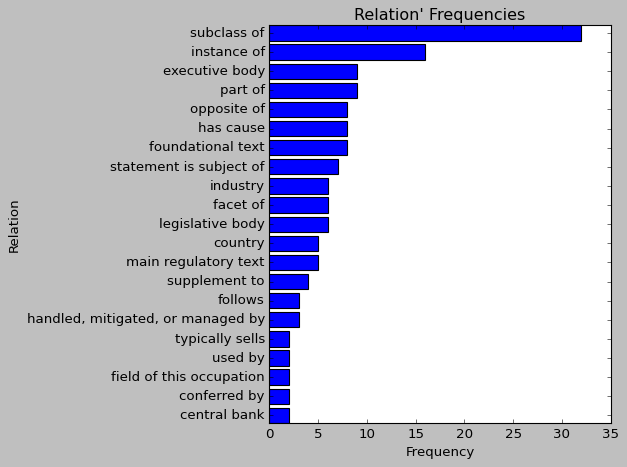

In [291]:
visualization_relik.freq_bar_plot()

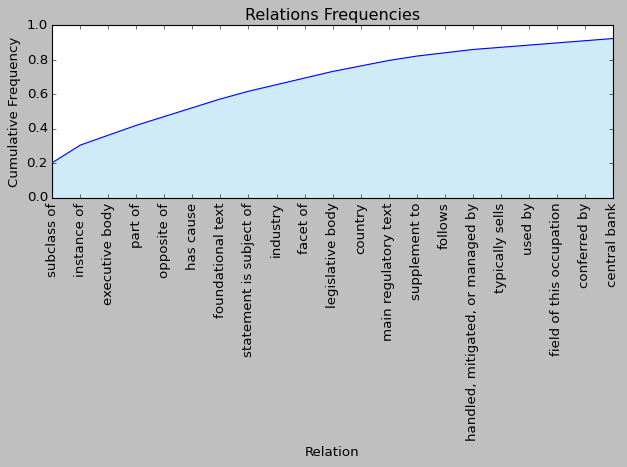

In [292]:
visualization_relik.cumulative_freq_plot()

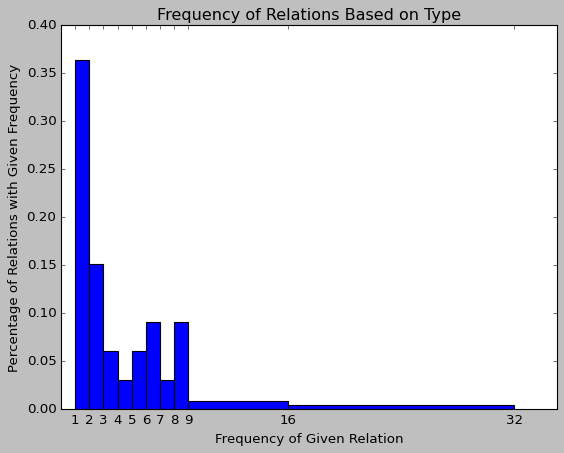

In [293]:
visualization_relik.relations_type_freq_plot()

In [294]:
relik_triplets_merged_no_na.to_csv('final_triplets_relik_clean_orig.csv', index=False)  

# Visualization of REBEL Triplets

In [2]:
# Load triplets dataframe 
rebel_triplets = pd.read_csv("REBEL_triples_per_sentence.csv")

rebel_triplets.head()

,Title,Articles,coreference_list_ready,coreference_paragraph_clean,coreference_sentence_clean,coreference_sentence,triplets_clean_sent
0,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 1 Subject matter,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,"[[{'head': 'european atomic energy community',..."
1,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions,‘applicant’ means a natural person or an entit...,applicant means a natural person or an entity ...,applicant means a natural person or an entity ...,‘applicant’ means a natural person or an entit...,"[[{'head': 'natural person', 'type': 'subclass..."
2,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions,"‘application document’ means a tender, a reque...",application document means a tender a request ...,application document means a tender a request ...,"‘application document’ means a tender, a reque...","[[{'head': 'grant application', 'type': 'subcl..."
3,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions,‘award procedure’ means a procurement procedur...,award procedure means a procurement procedure ...,award procedure means a procurement procedure ...,‘award procedure’ means a procurement procedur...,"[[{'head': 'procurement', 'type': 'part of', '..."
4,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions,"‘basic act’ means a legal act, other than a re...",basic act means a legal act other than a recom...,basic act means a legal act other than a recom...,"‘basic act’ means a legal act, other than a re...","[[{'head': 'euratom treaty', 'type': 'followed..."


In [3]:
def convert_to_list(column):
    return column.apply(ast.literal_eval)

rebel_triplets['triplets_clean_sent'] = convert_to_list(rebel_triplets['triplets_clean_sent'])


In [4]:
rebel_triplets['triplets_clean_sent'].tolist()

[[[{'head': 'european atomic energy community',
    'type': 'part of',
    'tail': 'european union'}],
  [{'head': 'european atomic energy community',
    'type': 'parent organization',
    'tail': 'european union'}],
  [{'head': 'european atomic energy community',
    'type': 'country',
    'tail': 'european union'}]],
 [[{'head': 'natural person', 'type': 'subclass of', 'tail': 'entity'}],
  [{'head': 'natural person', 'type': 'subclass of', 'tail': 'entity'},
   {'head': 'entity', 'type': 'has part', 'tail': 'natural person'}],
  [{'head': 'legal personality', 'type': 'subclass of', 'tail': 'entity'}]],
 [[{'head': 'grant application',
    'type': 'subclass of',
    'tail': 'application'}],
  [{'head': 'tender', 'type': 'subclass of', 'tail': 'application'}],
  [{'head': 'application', 'type': 'subclass of', 'tail': 'tender'}]],
 [[{'head': 'procurement', 'type': 'part of', 'tail': 'budget'}],
  [{'head': 'grant', 'type': 'subclass of', 'tail': 'procurement'}],
  [{'head': 'procurem

In [5]:
rebel_triplets['triplets_clean_sent'][0]

[[{'head': 'european atomic energy community',
   'type': 'part of',
   'tail': 'european union'}],
 [{'head': 'european atomic energy community',
   'type': 'parent organization',
   'tail': 'european union'}],
 [{'head': 'european atomic energy community',
   'type': 'country',
   'tail': 'european union'}]]

In [6]:
rebel_triplets.isna().sum()

Title                          0
Articles                       0
coreference_list_ready         0
coreference_paragraph_clean    0
coreference_sentence_clean     0
coreference_sentence           0
triplets_clean_sent            0
dtype: int64

In [7]:
rebel_triplets_exploded = rebel_triplets.explode("triplets_clean_sent")

In [8]:
rebel_triplets_exploded

,Title,Articles,coreference_list_ready,coreference_paragraph_clean,coreference_sentence_clean,coreference_sentence,triplets_clean_sent
0,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 1 Subject matter,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,"[{'head': 'european atomic energy community', ..."
0,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 1 Subject matter,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,"[{'head': 'european atomic energy community', ..."
0,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 1 Subject matter,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,"[{'head': 'european atomic energy community', ..."
1,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions,‘applicant’ means a natural person or an entit...,applicant means a natural person or an entity ...,applicant means a natural person or an entity ...,‘applicant’ means a natural person or an entit...,"[{'head': 'natural person', 'type': 'subclass ..."
1,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions,‘applicant’ means a natural person or an entit...,applicant means a natural person or an entity ...,applicant means a natural person or an entity ...,‘applicant’ means a natural person or an entit...,"[{'head': 'natural person', 'type': 'subclass ..."
...,...,...,...,...,...,...,...
2394,TITLE XVI \nINFORMATION REQUESTS AND DELEGATED...,Article 282 Entry into force and application,by way of derogation from paragraph 2 of this ...,by way of derogation from paragraph 2 of this ...,tajani for the council the president j,tajani for the council the president j,"[{'head': 'president', 'type': 'country', 'tai..."
2394,TITLE XVI \nINFORMATION REQUESTS AND DELEGATED...,Article 282 Entry into force and application,by way of derogation from paragraph 2 of this ...,by way of derogation from paragraph 2 of this ...,tajani for the council the president j,tajani for the council the president j,"[{'head': 'president', 'type': 'applies to jur..."
2395,TITLE XVI \nINFORMATION REQUESTS AND DELEGATED...,Article 282 Entry into force and application,by way of derogation from paragraph 2 of this ...,by way of derogation from paragraph 2 of this ...,bognerstrauss l 193186,bogner-strauss l 193/186,"[{'head': '193186', 'type': 'author', 'tail': ..."
2395,TITLE XVI \nINFORMATION REQUESTS AND DELEGATED...,Article 282 Entry into force and application,by way of derogation from paragraph 2 of this ...,by way of derogation from paragraph 2 of this ...,bognerstrauss l 193186,bogner-strauss l 193/186,"[{'head': '193186', 'type': 'named after', 'ta..."


In [9]:
rebel_triplets_exploded.iloc[0,6]

[{'head': 'european atomic energy community',
  'type': 'part of',
  'tail': 'european union'}]

In [10]:
def triplet_tuple(triplet_dictionary):

    return (triplet_dictionary[0]["head"], triplet_dictionary[0]["type"], triplet_dictionary[0]["tail"])



In [11]:
triplet_tuple(rebel_triplets_exploded.iloc[456,6])

('draft budget', 'subclass of', 'budget')

In [12]:
empty_triplets = rebel_triplets_exploded[rebel_triplets_exploded['triplets_clean_sent'].apply(lambda x: len(x) == 0)]
print(empty_triplets)


                                                  Title  \
12    TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...   
12    TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...   
46    TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...   
51    TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...   
88          TITLE II \nBUDGET AND BUDGETARY PRINCIPLES    
106         TITLE II \nBUDGET AND BUDGETARY PRINCIPLES    
106         TITLE II \nBUDGET AND BUDGETARY PRINCIPLES    
184         TITLE II \nBUDGET AND BUDGETARY PRINCIPLES    
689                   TITLE IV \nBUDGET IMPLEMENTATION    
719                   TITLE IV \nBUDGET IMPLEMENTATION    
719                   TITLE IV \nBUDGET IMPLEMENTATION    
719                   TITLE IV \nBUDGET IMPLEMENTATION    
969                   TITLE IV \nBUDGET IMPLEMENTATION    
987                             TITLE V \nCOMMON RULES    
1025                            TITLE V \nCOMMON RULES    
1684  TITLE XI \nCONTRIBUTIONS TO EUROPEAN POLITICAL... 

In [13]:
def triplet_tuple(triplet_dictionary):
    if not triplet_dictionary:  # Check if the list is empty
        return None  # Return a tuple of Nones or handle as desired
    return (triplet_dictionary[0]["head"], triplet_dictionary[0]["type"], triplet_dictionary[0]["tail"])


In [14]:
rebel_triplets_exploded['Triplet'] = rebel_triplets_exploded['triplets_clean_sent'].apply(triplet_tuple)

0    (european atomic energy community, part of, eu...
0    (european atomic energy community, parent orga...
0    (european atomic energy community, country, eu...
Name: Triplet, dtype: object

In [15]:
rebel_triplets_exploded.iloc[0,7]

('european atomic energy community', 'part of', 'european union')

In [16]:
rebel_triplets_exploded["Head"] = rebel_triplets_exploded["Triplet"].apply(lambda x: x[0].strip() if x is not None else None)
rebel_triplets_exploded["Relation"] = rebel_triplets_exploded["Triplet"].apply(lambda x: x[1].strip() if x is not None else None)
rebel_triplets_exploded["Tail"] = rebel_triplets_exploded["Triplet"].apply(lambda x: x[2].strip() if x is not None else None)

In [17]:
rebel_triplets_exploded

,Title,Articles,coreference_list_ready,coreference_paragraph_clean,coreference_sentence_clean,coreference_sentence,triplets_clean_sent,Triplet,Head,Relation,Tail
0,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 1 Subject matter,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,"[{'head': 'european atomic energy community', ...","(european atomic energy community, part of, eu...",european atomic energy community,part of,european union
0,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 1 Subject matter,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,"[{'head': 'european atomic energy community', ...","(european atomic energy community, parent orga...",european atomic energy community,parent organization,european union
0,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 1 Subject matter,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,"[{'head': 'european atomic energy community', ...","(european atomic energy community, country, eu...",european atomic energy community,country,european union
1,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions,‘applicant’ means a natural person or an entit...,applicant means a natural person or an entity ...,applicant means a natural person or an entity ...,‘applicant’ means a natural person or an entit...,"[{'head': 'natural person', 'type': 'subclass ...","(natural person, subclass of, entity)",natural person,subclass of,entity
1,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions,‘applicant’ means a natural person or an entit...,applicant means a natural person or an entity ...,applicant means a natural person or an entity ...,‘applicant’ means a natural person or an entit...,"[{'head': 'natural person', 'type': 'subclass ...","(natural person, subclass of, entity)",natural person,subclass of,entity
...,...,...,...,...,...,...,...,...,...,...,...
2394,TITLE XVI \nINFORMATION REQUESTS AND DELEGATED...,Article 282 Entry into force and application,by way of derogation from paragraph 2 of this ...,by way of derogation from paragraph 2 of this ...,tajani for the council the president j,tajani for the council the president j,"[{'head': 'president', 'type': 'country', 'tai...","(president, country, Tajani)",president,country,Tajani
2394,TITLE XVI \nINFORMATION REQUESTS AND DELEGATED...,Article 282 Entry into force and application,by way of derogation from paragraph 2 of this ...,by way of derogation from paragraph 2 of this ...,tajani for the council the president j,tajani for the council the president j,"[{'head': 'president', 'type': 'applies to jur...","(president, applies to jurisdiction, Tajani)",president,applies to jurisdiction,Tajani
2395,TITLE XVI \nINFORMATION REQUESTS AND DELEGATED...,Article 282 Entry into force and application,by way of derogation from paragraph 2 of this ...,by way of derogation from paragraph 2 of this ...,bognerstrauss l 193186,bogner-strauss l 193/186,"[{'head': '193186', 'type': 'author', 'tail': ...","(193186, author, Bognerstrauss)",193186,author,Bognerstrauss
2395,TITLE XVI \nINFORMATION REQUESTS AND DELEGATED...,Article 282 Entry into force and application,by way of derogation from paragraph 2 of this ...,by way of derogation from paragraph 2 of this ...,bognerstrauss l 193186,bogner-strauss l 193/186,"[{'head': '193186', 'type': 'named after', 'ta...","(193186, named after, Bognerstrauss)",193186,named after,Bognerstrauss


In [18]:
rebel_triplets_exploded.isna().sum()

Title                           0
Articles                        0
coreference_list_ready          0
coreference_paragraph_clean     0
coreference_sentence_clean      0
coreference_sentence            0
triplets_clean_sent             0
Triplet                        31
Head                           31
Relation                       31
Tail                           31
dtype: int64

In [19]:
rebel_triplets_exploded = rebel_triplets_exploded.dropna()

In [20]:
rebel_triplets_exploded.duplicated(["Head","Relation","Tail"]).sum()

2198

In [21]:

rebel_triplets_exploded.duplicated(["Triplet"]).sum()

2198

In [22]:
rebel_triplets_exploded.drop_duplicates(["Triplet"], inplace=True, ignore_index=True)

C:\Users\Student\AppData\Local\Temp\ipykernel_11956\2400984906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rebel_triplets_exploded.drop_duplicates(["Triplet"], inplace=True, ignore_index=True)


In [23]:
rebel_triplets_exploded

,Title,Articles,coreference_list_ready,coreference_paragraph_clean,coreference_sentence_clean,coreference_sentence,triplets_clean_sent,Triplet,Head,Relation,Tail
0,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 1 Subject matter,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,"[{'head': 'european atomic energy community', ...","(european atomic energy community, part of, eu...",european atomic energy community,part of,european union
1,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 1 Subject matter,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,"[{'head': 'european atomic energy community', ...","(european atomic energy community, parent orga...",european atomic energy community,parent organization,european union
2,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 1 Subject matter,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,"[{'head': 'european atomic energy community', ...","(european atomic energy community, country, eu...",european atomic energy community,country,european union
3,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions,‘applicant’ means a natural person or an entit...,applicant means a natural person or an entity ...,applicant means a natural person or an entity ...,‘applicant’ means a natural person or an entit...,"[{'head': 'natural person', 'type': 'subclass ...","(natural person, subclass of, entity)",natural person,subclass of,entity
4,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions,‘applicant’ means a natural person or an entit...,applicant means a natural person or an entity ...,applicant means a natural person or an entity ...,‘applicant’ means a natural person or an entit...,"[{'head': 'legal personality', 'type': 'subcla...","(legal personality, subclass of, entity)",legal personality,subclass of,entity
...,...,...,...,...,...,...,...,...,...,...,...
4954,TITLE XVI \nINFORMATION REQUESTS AND DELEGATED...,Article 282 Entry into force and application,by way of derogation from paragraph 2 of this ...,by way of derogation from paragraph 2 of this ...,tajani for the council the president j,tajani for the council the president j,"[{'head': 'president', 'type': 'country', 'tai...","(president, country, Tajani)",president,country,Tajani
4955,TITLE XVI \nINFORMATION REQUESTS AND DELEGATED...,Article 282 Entry into force and application,by way of derogation from paragraph 2 of this ...,by way of derogation from paragraph 2 of this ...,tajani for the council the president j,tajani for the council the president j,"[{'head': 'president', 'type': 'applies to jur...","(president, applies to jurisdiction, Tajani)",president,applies to jurisdiction,Tajani
4956,TITLE XVI \nINFORMATION REQUESTS AND DELEGATED...,Article 282 Entry into force and application,by way of derogation from paragraph 2 of this ...,by way of derogation from paragraph 2 of this ...,bognerstrauss l 193186,bogner-strauss l 193/186,"[{'head': '193186', 'type': 'author', 'tail': ...","(193186, author, Bognerstrauss)",193186,author,Bognerstrauss
4957,TITLE XVI \nINFORMATION REQUESTS AND DELEGATED...,Article 282 Entry into force and application,by way of derogation from paragraph 2 of this ...,by way of derogation from paragraph 2 of this ...,bognerstrauss l 193186,bogner-strauss l 193/186,"[{'head': '193186', 'type': 'named after', 'ta...","(193186, named after, Bognerstrauss)",193186,named after,Bognerstrauss


# Triplets Neo4j

In [40]:
triplets_df_nostop.head()

,Title,Articles,Content,coreference_list_ready,Cleaned_Content_new,triplets_list,empty_list,many_triplets,head,relation,tail,is_stopword,head_nostop,head_has_noun,tail_has_noun,head_noun_chunks,tail_noun_chunks,new_tail,new_head
0,"TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 1 Subject matter,[\nThis Regulation lays down the rules for the...,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,"[this regulation, lay, the rules for the estab...",False,False,this regulation,lay,the rules for the establishment and the implem...,False,regulation,True,True,[regulation],"[rules, establishment, implementation, general...",european union,regulation
1,"TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,applicant means a natural person or an entity ...,applicant means a natural person or an entity ...,"[applicant, mean, a natural person or an entit...",False,True,applicant,mean,a natural person or an entity with or without ...,False,applicant,True,True,[applicant],"[natural person, entity, legal personality, , ...",grant award procedure,applicant
2,"TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,application document means a tender a request ...,application document means a tender a request ...,"[application document, mean, a tender a reques...",False,False,application document,mean,a tender a request to participate a grant appl...,False,application document,True,True,[application document],"[tender, request, grant application, applicati...",grant application,application document
3,"TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,award procedure means a procurement procedure ...,award procedure means a procurement procedure ...,"[award procedure, mean, a procurement procedur...",False,False,award procedure,mean,a procurement procedure a grant award procedur...,False,award procedure,True,True,[award procedure],"[procurement procedure, grant award procedure,...",article 621,award procedure
4,"TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,basic act means a legal act other than a recom...,basic act means a legal act other than a recom...,"[basic act, mean, a legal act other than a rec...",False,True,basic act,mean,a legal act other than a recommendation or an ...,False,basic act,True,True,[basic act],"[legal act, recommendation, opinion, , legal b...",european union,basic act


In [41]:
triplets_df_nostop.columns

Index(['Title', 'Articles', 'Content', 'coreference_list_ready',
       'Cleaned_Content_new', 'triplets_list', 'empty_list', 'many_triplets',
       'head', 'relation', 'tail', 'is_stopword', 'head_nostop',
       'head_has_noun', 'tail_has_noun', 'head_noun_chunks',
       'tail_noun_chunks', 'new_tail', 'new_head'],
      dtype='object')

In [42]:
triplets_neo4j = triplets_df_nostop[['new_head', 'relation', 'new_tail', 'tail', 'tail_noun_chunks', 'Title', 'Articles','Content']]

triplets_neo4j = triplets_neo4j.rename(columns={'new_head': 'Head', 'relation': 'Relation', 'new_tail': 'Tail', 'tail':'Original Tail', 'tail_noun_chunks':'Tail Noun Chunks', 'Articles': 'Article'
                                                ,'Content': 'Original Article Text'})
triplets_neo4j.reset_index(drop=True)

pattern = '\n'
triplets_neo4j['Title'] = triplets_neo4j['Title'].apply(lambda x: re.sub(pattern, '', x).strip())

triplets_neo4j.head() 

,Head,Relation,Tail,Original Tail,Tail Noun Chunks,Title,Article,Original Article Text
0,regulation,lay,european union,the rules for the establishment and the implem...,"[rules, establishment, implementation, general...","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 1 Subject matter,[\nThis Regulation lays down the rules for the...
1,applicant,mean,grant award procedure,a natural person or an entity with or without ...,"[natural person, entity, legal personality, , ...","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...
2,application document,mean,grant application,a tender a request to participate a grant appl...,"[tender, request, grant application, applicati...","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...
3,award procedure,mean,article 621,a procurement procedure a grant award procedur...,"[procurement procedure, grant award procedure,...","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...
4,basic act,mean,european union,a legal act other than a recommendation or an ...,"[legal act, recommendation, opinion, , legal b...","TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...


In [43]:
triplets_neo4j.iloc[0,4]

['rules',
 'establishment',
 'implementation',
 'general budget',
 'european union',
 'european atomic energy community',
 'budget',
 'presentation',
 'auditing',
 'european union']

In [44]:
triplets_neo4j.to_csv('triplets_neo4j_2.csv', index=False)  

In [40]:
triplets_neo4j.iloc[1,3]

'a natural person or an entity with or without legal personality who has submitted an application in a grant award procedure or in a contest for prizes'

In [51]:
triplets_neo4j.iloc[725,0] + ' ' +  '!' +  ' ' + triplets_neo4j.iloc[725,1] + ' ' + '!' + ' '  + triplets_neo4j.iloc[725,2]

'member ! inform ! union institution'